# DECODING THE AIR: PREDICTING OPTIMAL TIMING FOR HEALTH AND COGNITIVE ACTIVITIES BASED ON AQI AND PM2.5
Research paper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Loading and Cleaning DATA

In [ ]:
df1 = pd.read_csv('/content/aweek1.csv')
df2 = pd.read_csv('/content/aweek2.csv')
df3 = pd.read_csv('/content/aweek3.csv')
df4 = pd.read_csv('/content/aweek4.csv')


In [ ]:
print("df1 columns:", df1.columns)
print("df2 columns:", df2.columns)
print("df3 columns:", df3.columns)
print("df4 columns:", df4.columns)

df1 columns: Index(['Date', 'Time', 'AQI', 'PM 2.5 - ug/m³', 'PM 10 - ug/m³', 'Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Heat Index - °C'],
      dtype='object')
df2 columns: Index(['Date', 'Time', 'AQI', 'PM 2.5 - ug/m³', 'PM 10 - ug/m³', 'Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Heat Index - °C'],
      dtype='object')
df3 columns: Index(['Date', 'Time', 'AQI', 'PM 2.5 - ug/m³', 'PM 10 - ug/m³', 'Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Heat Index - °C'],
      dtype='object')
df4 columns: Index(['Date', 'Time', 'AQI', 'PM 2.5 - ug/m³', 'PM 10 - ug/m³', 'Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Heat Index - °C'],
      dtype='object')


In [ ]:
print(df2.to_string())

                 Date      Time    AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  Temp - °C  Hum - %  Dew Point - °C  Wet Bulb - °C  Heat Index - °C
0    03-08-2023 00:00  00:00:00  120.0            67.0           78.0       28.0     56.0            19.0           21.0             29.0
1    03-08-2023 00:00  01:00:00  132.0            70.0           80.0       29.0     54.0            18.0           21.0             30.0
2    03-08-2023 00:00  02:00:00  159.0            78.0           89.0       28.0     62.0            20.0           22.0             30.0
3    03-08-2023 00:00  03:00:00  127.0            68.0           78.0       28.0     46.0            15.0           18.0             28.0
4    03-08-2023 00:00  04:00:00   95.0            57.0           71.0       28.0     43.0            14.0           17.0             27.0
5    03-08-2023 00:00  05:00:00   98.0            60.0           74.0       28.0     42.0            14.0           17.0             27.0
6    03-08-2023 00:00  06:00:00  1

In [ ]:
df2.dropna()

Date      Time    AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  \
0    03-08-2023 00:00  00:00:00  120.0            67.0           78.0   
1    03-08-2023 00:00  01:00:00  132.0            70.0           80.0   
2    03-08-2023 00:00  02:00:00  159.0            78.0           89.0   
3    03-08-2023 00:00  03:00:00  127.0            68.0           78.0   
4    03-08-2023 00:00  04:00:00   95.0            57.0           71.0   
..                ...       ...    ...             ...            ...   
163         3/14/2023  19:00:00   94.0            56.0           71.0   
164         3/14/2023  20:00:00   93.0            56.0           70.0   
165         3/14/2023  21:00:00   96.0            58.0           72.0   
166         3/14/2023  22:00:00   96.0            58.0           71.0   
167         3/14/2023  23:00:00  102.0            61.0           74.0   

     Temp - °C  Hum - %  Dew Point - °C  Wet Bulb - °C  Heat Index - °C  
0         28.0     56.0            19.0           21.0             29.0  
1         29.0     54.0            18.0           21.0             30.0  
2         28.0     62.0            20.0           22.0             30.0  
3         28.0     46.0            15.0           18.0             28.0  
4         28.0     43.0            14.0           17.0             27.0  
..         ...      ...             ...            ...              ...  
163       29.0     65.0            22.0           24.0             33.0  
164       29.0     65.0            22.0           23.0             32.0  
165       29.0     66.0            22.0           24.0             33.0  
166       29.0     64.0            22.0           24.0             33.0  
167       29.0     66.0            22.0           24.0             33.0  

[168 rows x 10 columns]

In [ ]:
df1.dropna()

Date      Time  AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  \
0    03-01-2023 00:00  00:00:00  175              83             93   
1    03-01-2023 00:00  01:00:00  228              99            111   
2    03-01-2023 00:00  02:00:00  227              99            110   
3    03-01-2023 00:00  03:00:00  204              92            101   
4    03-01-2023 00:00  04:00:00  191              87             97   
..                ...       ...  ...             ...            ...   
163  03-07-2023 00:00  19:00:00   99              60             73   
164  03-07-2023 00:00  20:00:00  139              72             82   
165  03-07-2023 00:00  21:00:00  284             115            130   
166  03-07-2023 00:00  22:00:00  150              76             85   
167  03-07-2023 00:00  23:00:00   98              59             73   

     Temp - °C  Hum - %  Dew Point - °C  Wet Bulb - °C  Heat Index - °C  
0           28       47              15             18               28  
1           27       49              16             18               27  
2           27       68              20             22               28  
3           26       76              21             22               27  
4           26       63              18             20               26  
..         ...      ...             ...            ...              ...  
163         29       64              22             23               32  
164         28       67              22             23               31  
165         29       69              23             24               33  
166         28       66              21             23               31  
167         28       61              20             22               30  

[168 rows x 10 columns]

In [ ]:
df3.dropna()

Date   Time  AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  Temp - °C  Hum - %  \
0    3/15/2023  00:00  119              66             77         29       61   
1    3/15/2023  01:00  106              62             75         29       64   
2    3/15/2023  02:00   96              58             71         29       50   
3    3/15/2023  03:00   95              57             70         29       49   
4    3/15/2023  04:00   93              56             70         29       52   
..         ...    ...  ...             ...            ...        ...      ...   
163  3/21/2023  19:00   41              24             29         30       56   
164  3/21/2023  20:00   41              24             28         29       60   
165  3/21/2023  21:00   39              23             27         29       61   
166  3/21/2023  22:00   36              22             25         29       62   
167  3/21/2023  23:00   37              22             25         28       64   

     Dew Point - °C  Wet Bulb - °C  Heat Index - °C  
0                21             23               32  
1                22             23               32  
2                18             20               30  
3                17             19               29  
4                18             20               29  
..              ...            ...              ...  
163              20             22               32  
164              20             22               31  
165              20             22               30  
166              21             22               30  
167              21             22               30  

[168 rows x 10 columns]

In [ ]:
df4.dropna()

Date   Time  AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  Temp - °C  Hum - %  \
0    3/22/2023  00:00   39              23             27         28       64   
1    3/22/2023  01:00   34              20             24         28       65   
2    3/22/2023  02:00   33              20             23         27       66   
3    3/22/2023  03:00   31              19             22         27       66   
4    3/22/2023  04:00   31              18             20         27       68   
..         ...    ...  ...             ...            ...        ...      ...   
163  3/28/2023  19:00   38              23             29         28       63   
164  3/28/2023  20:00   41              24             31         28       64   
165  3/28/2023  21:00   42              25             31         28       65   
166  3/28/2023  22:00   43              26             31         28       66   
167  3/28/2023  23:00   43              26             32         28       67   

     Dew Point - °C  Wet Bulb - °C  Heat Index - °C  
0                21             22               30  
1                20             22               29  
2                21             22               29  
3                21             22               29  
4                21             22               29  
..              ...            ...              ...  
163              20             22               30  
164              21             22               30  
165              21             22               30  
166              21             22               29  
167              21             22               30  

[168 rows x 10 columns]

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['DayOfWeek'] = df1['Date'].dt.day_name()

df2['Date'] = pd.to_datetime(df2['Date'])
df2['DayOfWeek'] = df2['Date'].dt.day_name()

df3['Date'] = pd.to_datetime(df3['Date'])
df3['DayOfWeek'] = df3['Date'].dt.day_name()

df4['Date'] = pd.to_datetime(df4['Date'])
df4['DayOfWeek'] = df4['Date'].dt.day_name()

## Visualising Data

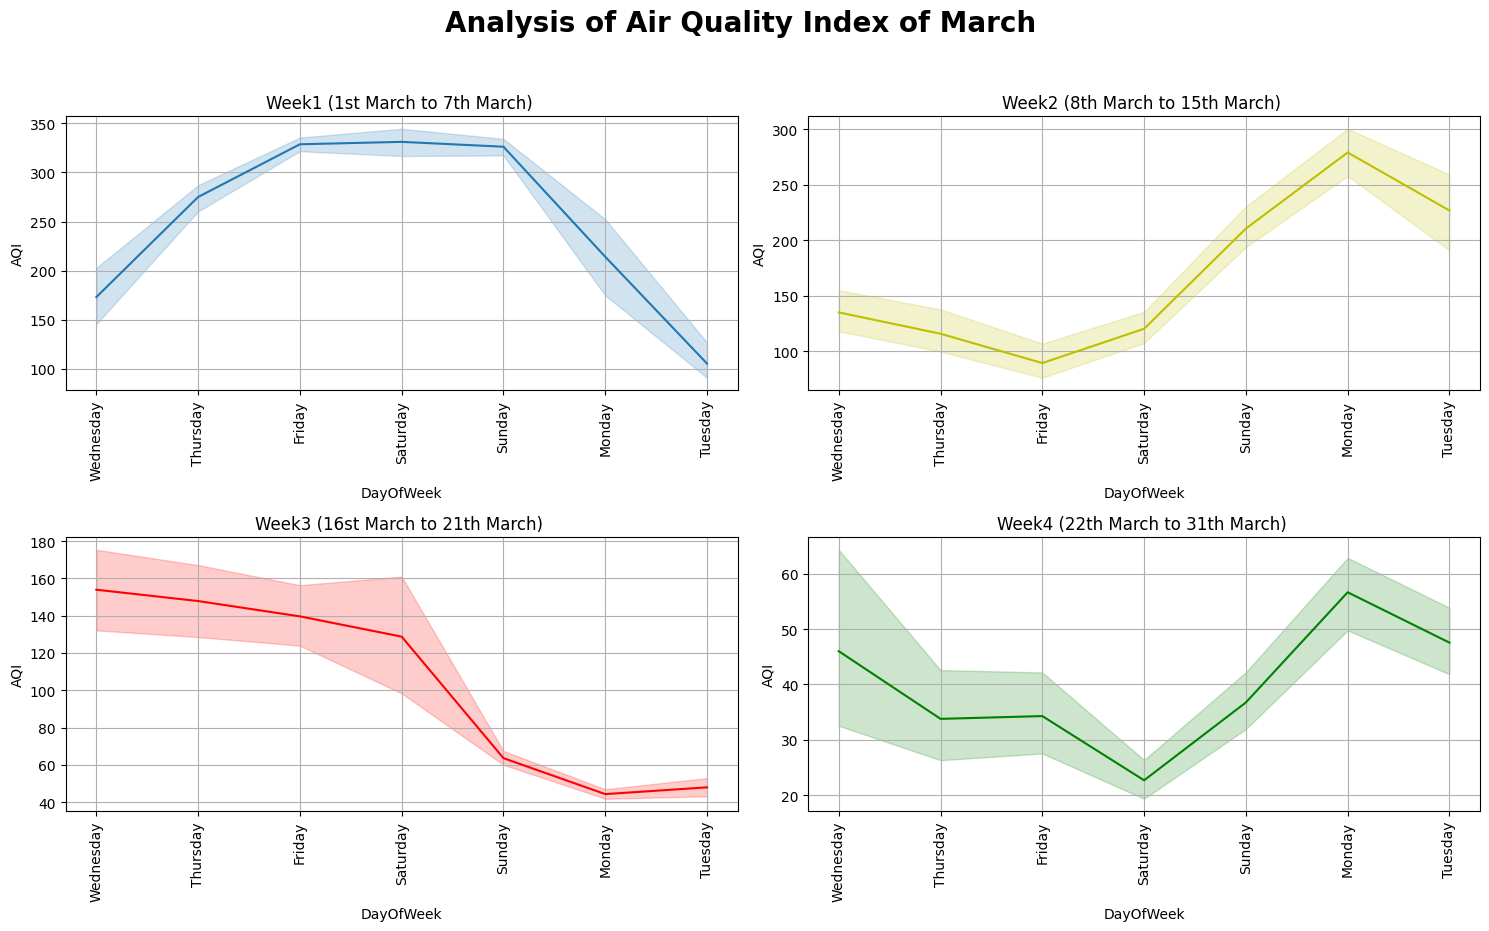

In [ ]:
plt.figure(figsize=(15,9))

plt.subplot(2, 2, 1)
# Remove extra space from column name
# Plot the line graph
sns.lineplot(x='DayOfWeek', y='AQI', data=df1)
plt.grid(True)
plt.title('Week1 (1st March to 7th March) ')
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(2, 2, 2)
# Remove extra space from column name

# Plot the line graph
sns.lineplot(x='DayOfWeek', y='AQI', data=df2,color='y')
plt.grid(True)
plt.title('Week2 (8th March to 15th March) ')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
# Remove extra space from column name

# Plot the line graph
sns.lineplot(x='DayOfWeek', y='AQI', data=df3,color='r')
plt.grid(True)
plt.title('Week3 (16st March to 21th March) ')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
# Remove extra space from column name

# Plot the line graph
sns.lineplot(x='DayOfWeek', y='AQI', data=df4,color='green')
plt.grid(True)
plt.title('Week4 (22th March to 31th March) ')
plt.xticks(rotation=90)

plt.suptitle('Analysis of Air Quality Index of March ', y=1.03 ,ha='center',fontweight='bold',fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
def plot_analysis(y_parameter):
    dataframes = [df1, df2, df3, df4]

    plt.figure(figsize=(15, 9))

    for i, (df, color) in enumerate(zip(dataframes, ['blue', 'y', 'red', 'green']), 1):
        plt.subplot(2, 2, i)
        # Remove extra space from column name
        df['Date'] = pd.to_datetime(df['Date'])
        start_date = df['Date'].min().strftime('%dth %B')
        end_date = df['Date'].max().strftime('%dth %B %Y')
        # Plot the line graph
        sns.lineplot(x='DayOfWeek', y=y_parameter, data=df, color=color)
        plt.grid(True)
        plt.title(f'Week {i} ({start_date} to {end_date})')
        plt.xticks(rotation=90)

    plt.suptitle(f'Analysis of {y_parameter} of March', y=1.03, ha='center', fontweight='bold', fontsize=20)
    plt.tight_layout()
    plt.show()

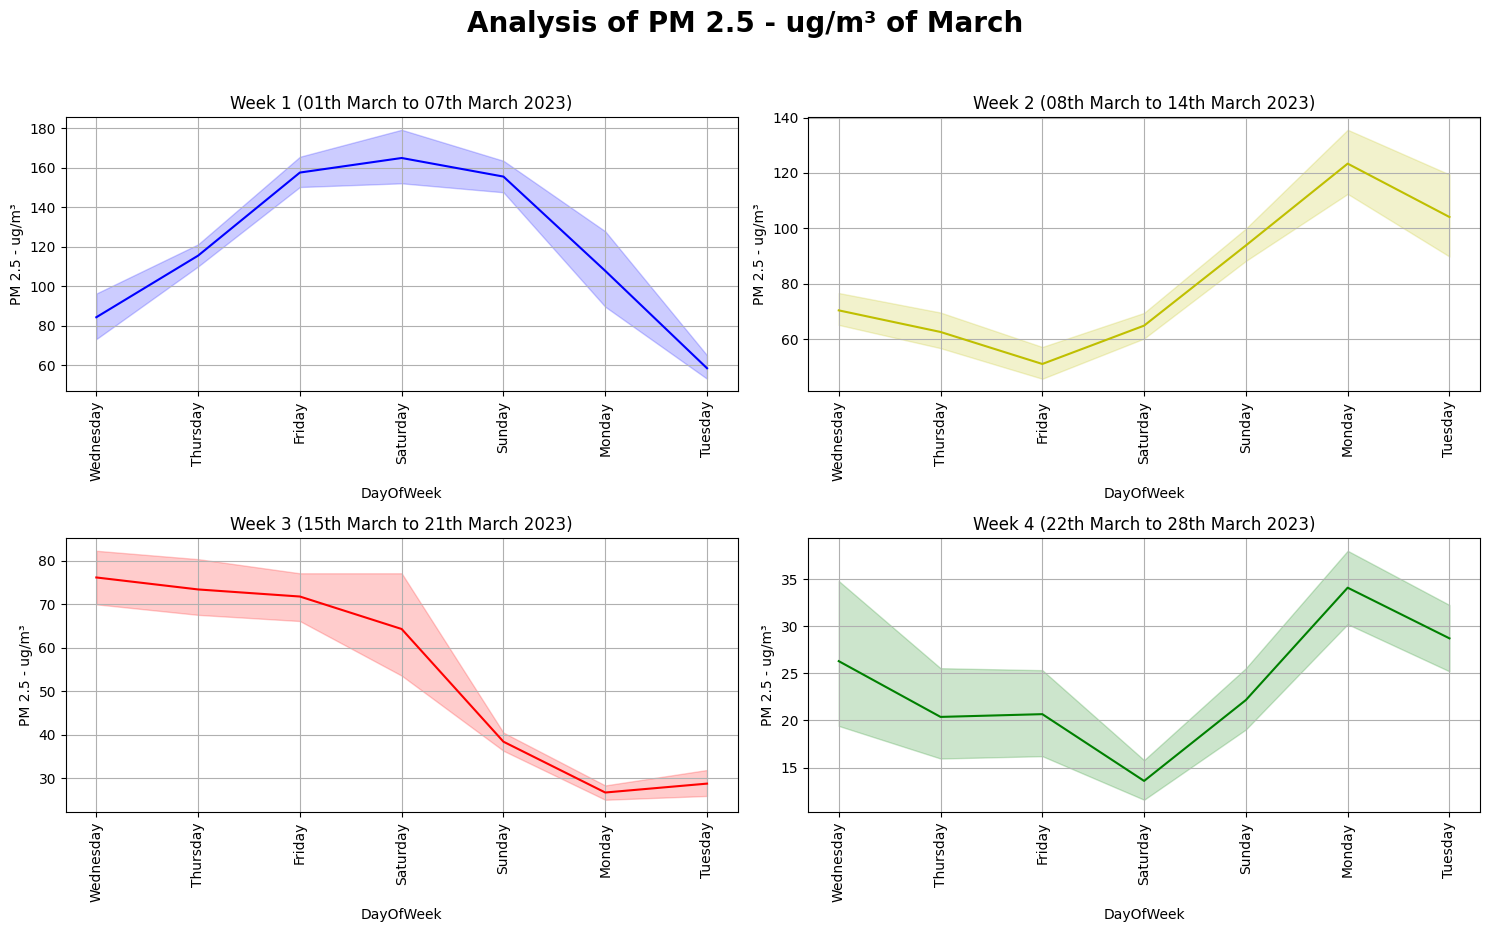

In [ ]:
column_name = 'PM 2.5 - ug/m³'
# Call the function with the specified column name
plot_analysis(column_name)

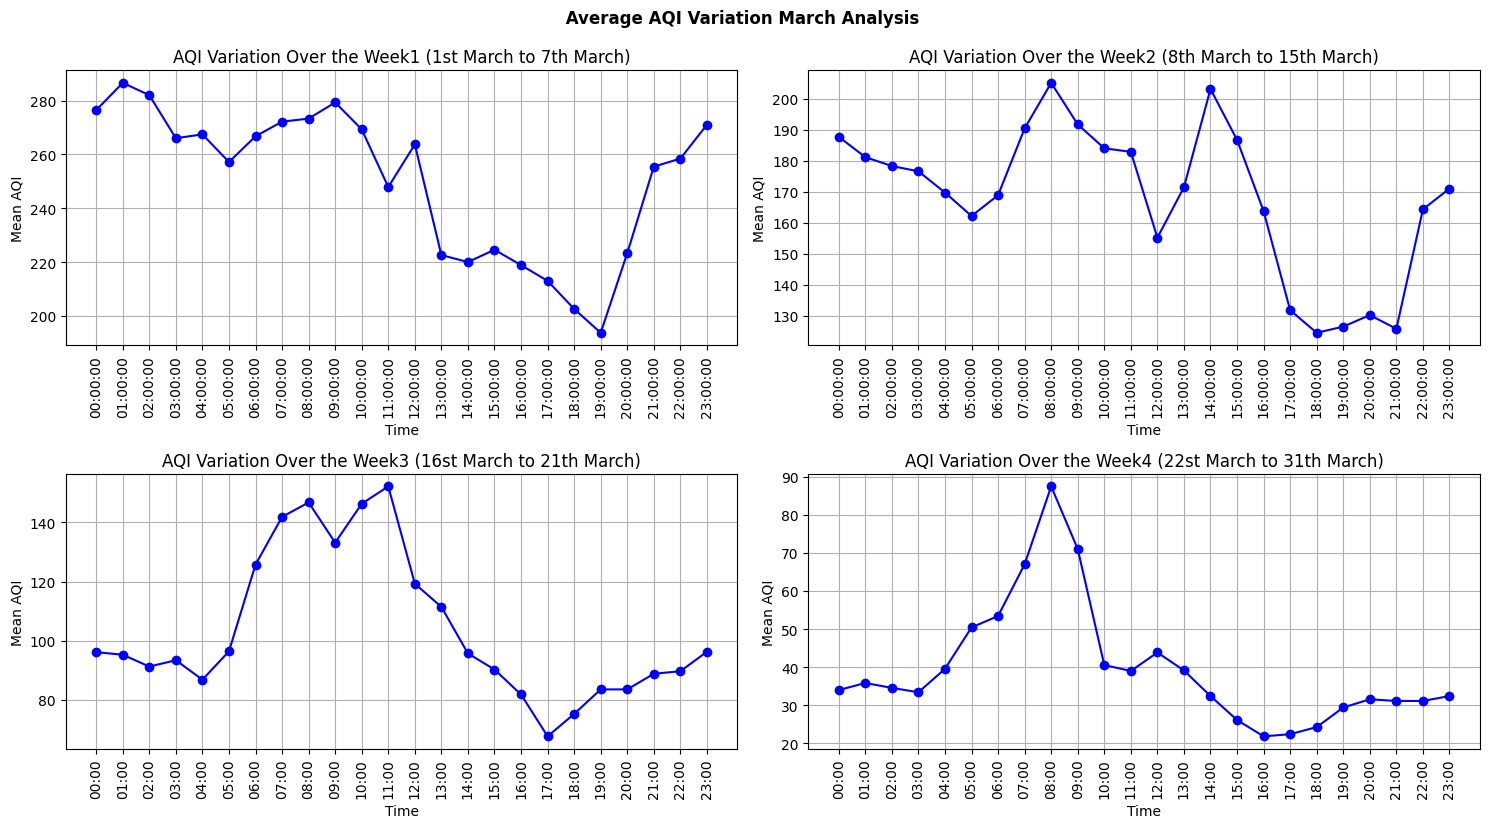

In [ ]:
plt.figure(figsize= (15,8))

plt.subplot(2, 2, 1)
df = df1.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week1 (1st March to 7th March)')
plt.grid(True)

plt.subplot(2, 2, 2)
df = df2.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week2 (8th March to 15th March)')
plt.grid(True)


plt.subplot(2, 2, 3)
df = df3.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week3 (16st March to 21th March)')
plt.grid(True)


plt.subplot(2, 2, 4)
df = df4.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week4 (22st March to 31th March)')
plt.grid(True)

plt.tight_layout()
plt.suptitle(' Average AQI Variation March Analysis  ', y=1.03 ,ha='center',fontweight='bold')
# Show the plots
plt.show()

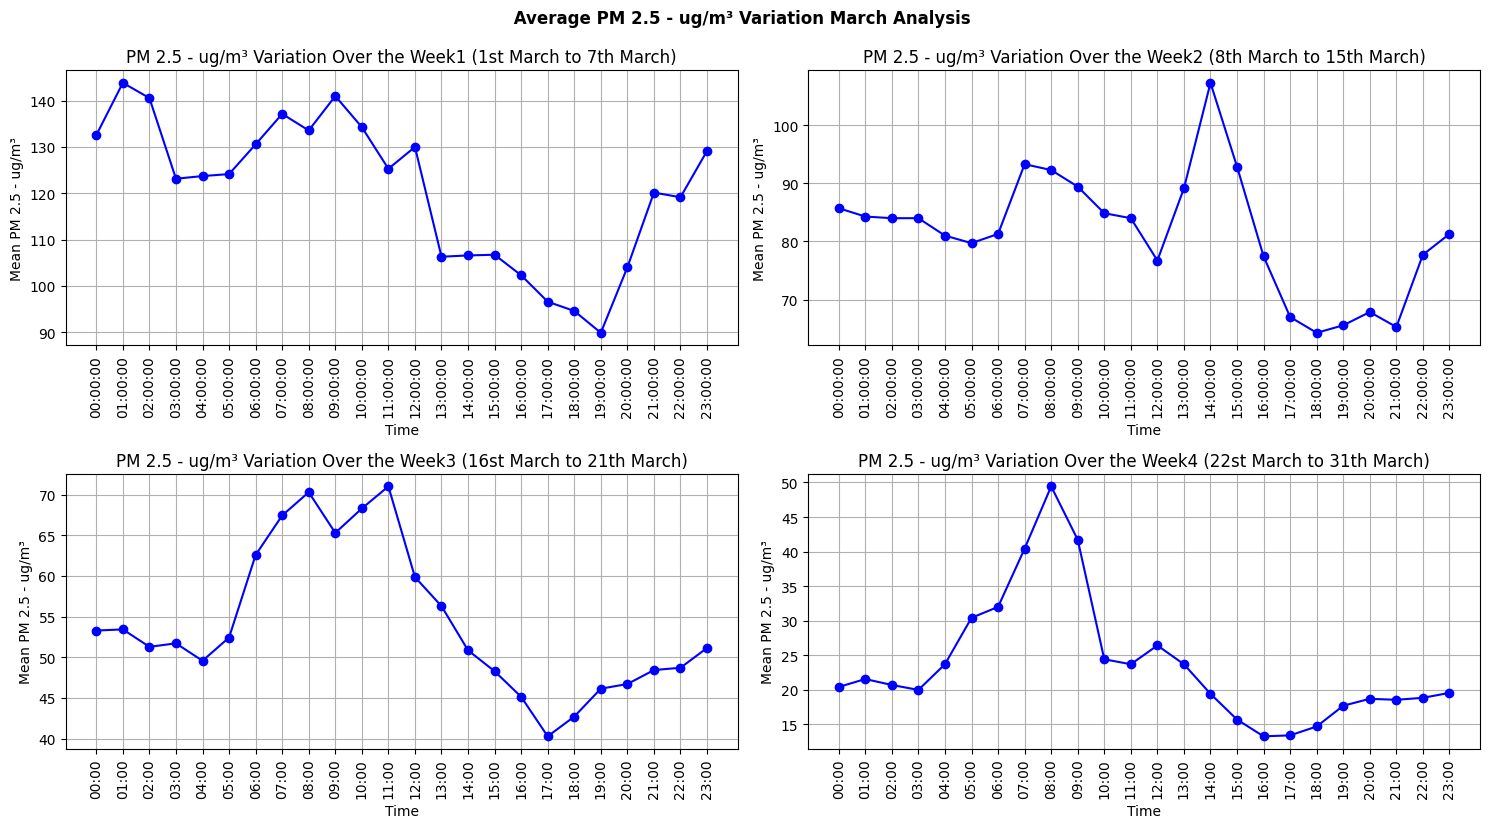

In [ ]:
plt.figure(figsize= (15,8))

plt.subplot(2, 2, 1)
df = df1.copy()
grouped_data = df.groupby('Time')['PM 2.5 - ug/m³'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['PM 2.5 - ug/m³'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean PM 2.5 - ug/m³')
plt.title('PM 2.5 - ug/m³ Variation Over the Week1 (1st March to 7th March)')
plt.grid(True)

plt.subplot(2, 2, 2)
df = df2.copy()
grouped_data = df.groupby('Time')['PM 2.5 - ug/m³'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['PM 2.5 - ug/m³'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean PM 2.5 - ug/m³')
plt.title('PM 2.5 - ug/m³ Variation Over the Week2 (8th March to 15th March)')
plt.grid(True)


plt.subplot(2, 2, 3)
df = df3.copy()
grouped_data = df.groupby('Time')['PM 2.5 - ug/m³'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['PM 2.5 - ug/m³'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean PM 2.5 - ug/m³')
plt.title('PM 2.5 - ug/m³ Variation Over the Week3 (16st March to 21th March)')
plt.grid(True)


plt.subplot(2, 2, 4)
df = df4.copy()
grouped_data = df.groupby('Time')['PM 2.5 - ug/m³'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['PM 2.5 - ug/m³'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean PM 2.5 - ug/m³')
plt.title('PM 2.5 - ug/m³ Variation Over the Week4 (22st March to 31th March)')
plt.grid(True)

plt.tight_layout()
plt.suptitle(' Average PM 2.5 - ug/m³ Variation March Analysis  ', y=1.03 ,ha='center',fontweight='bold')
# Show the plots
plt.show()

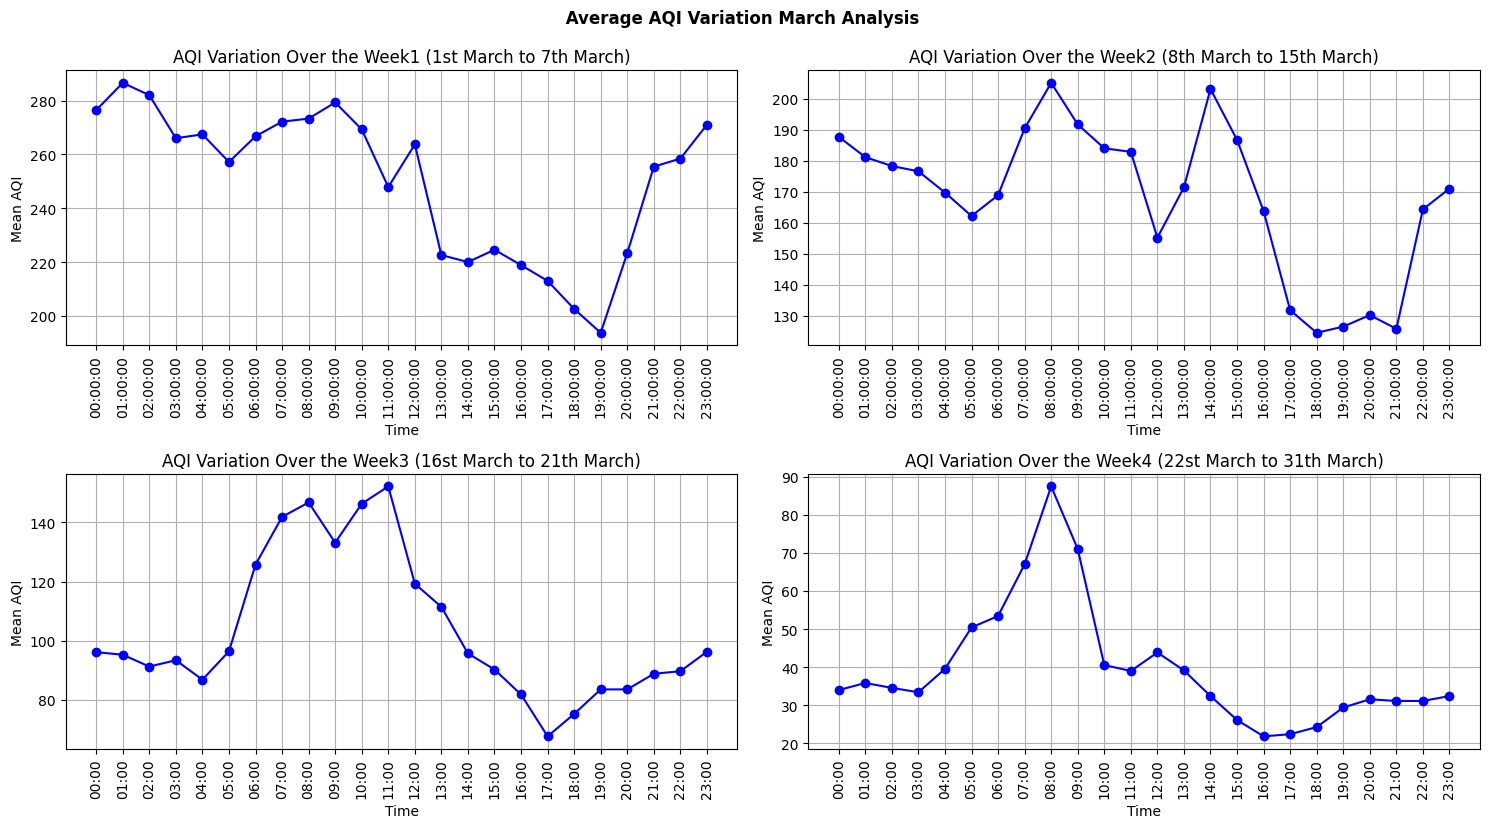

In [ ]:
plt.figure(figsize= (15,8))

plt.subplot(2, 2, 1)
df = df1.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week1 (1st March to 7th March)')
plt.grid(True)

plt.subplot(2, 2, 2)
df = df2.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week2 (8th March to 15th March)')
plt.grid(True)


plt.subplot(2, 2, 3)
df = df3.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week3 (16st March to 21th March)')
plt.grid(True)


plt.subplot(2, 2, 4)
df = df4.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week4 (22st March to 31th March)')
plt.grid(True)

plt.tight_layout()
plt.suptitle(' Average AQI Variation March Analysis  ', y=1.03 ,ha='center',fontweight='bold')
# Show the plots
plt.show()

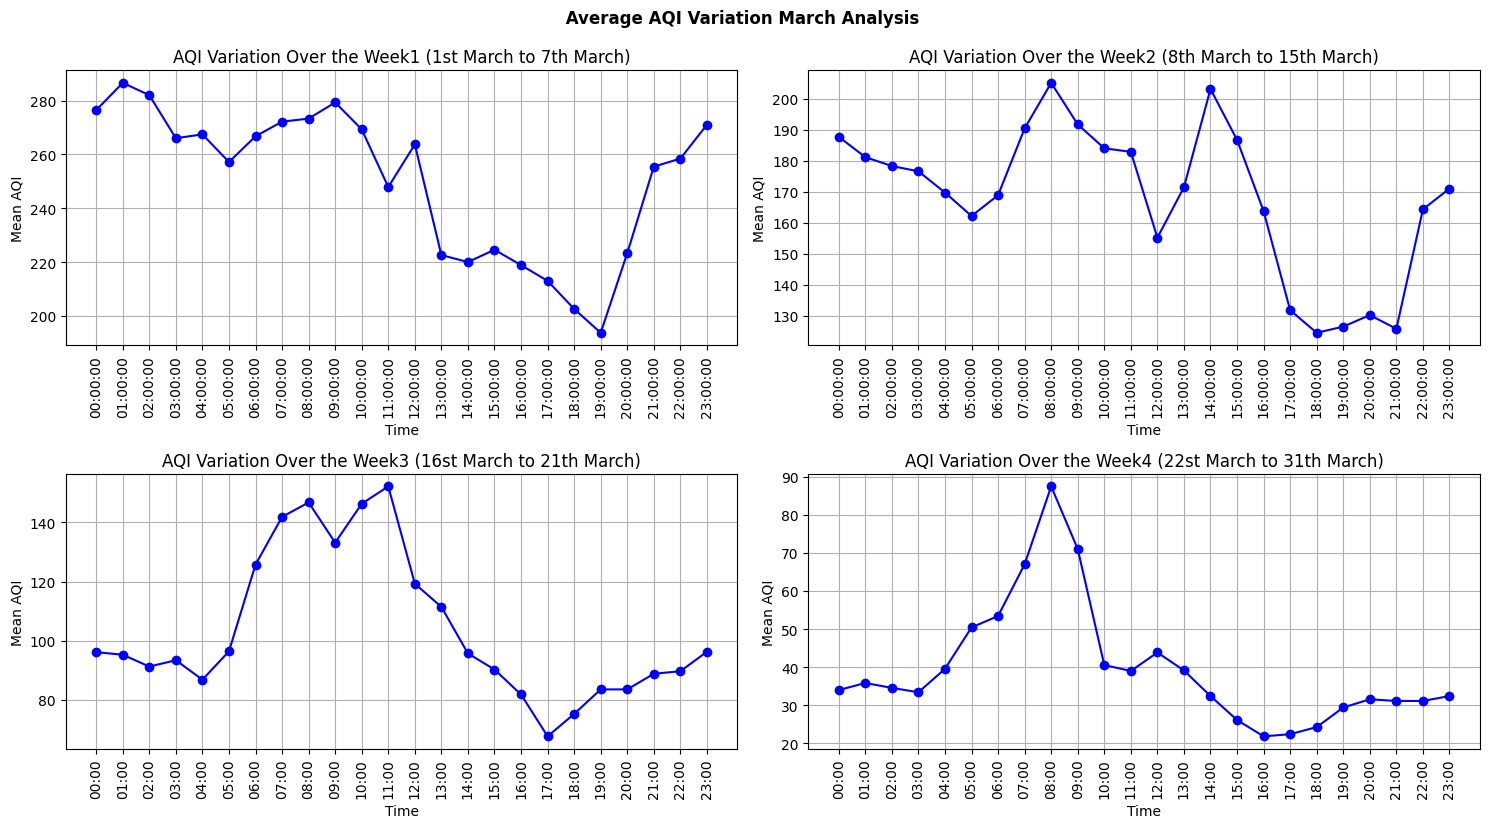

In [ ]:
plt.figure(figsize= (15,8))

plt.subplot(2, 2, 1)
df = df1.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week1 (1st March to 7th March)')
plt.grid(True)

plt.subplot(2, 2, 2)
df = df2.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week2 (8th March to 15th March)')
plt.grid(True)


plt.subplot(2, 2, 3)
df = df3.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week3 (16st March to 21th March)')
plt.grid(True)


plt.subplot(2, 2, 4)
df = df4.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week4 (22st March to 31th March)')
plt.grid(True)

plt.tight_layout()
plt.suptitle(' Average AQI Variation March Analysis  ', y=1.03 ,ha='center',fontweight='bold')
# Show the plots
plt.show()

#### seprate visvalization of above graphs


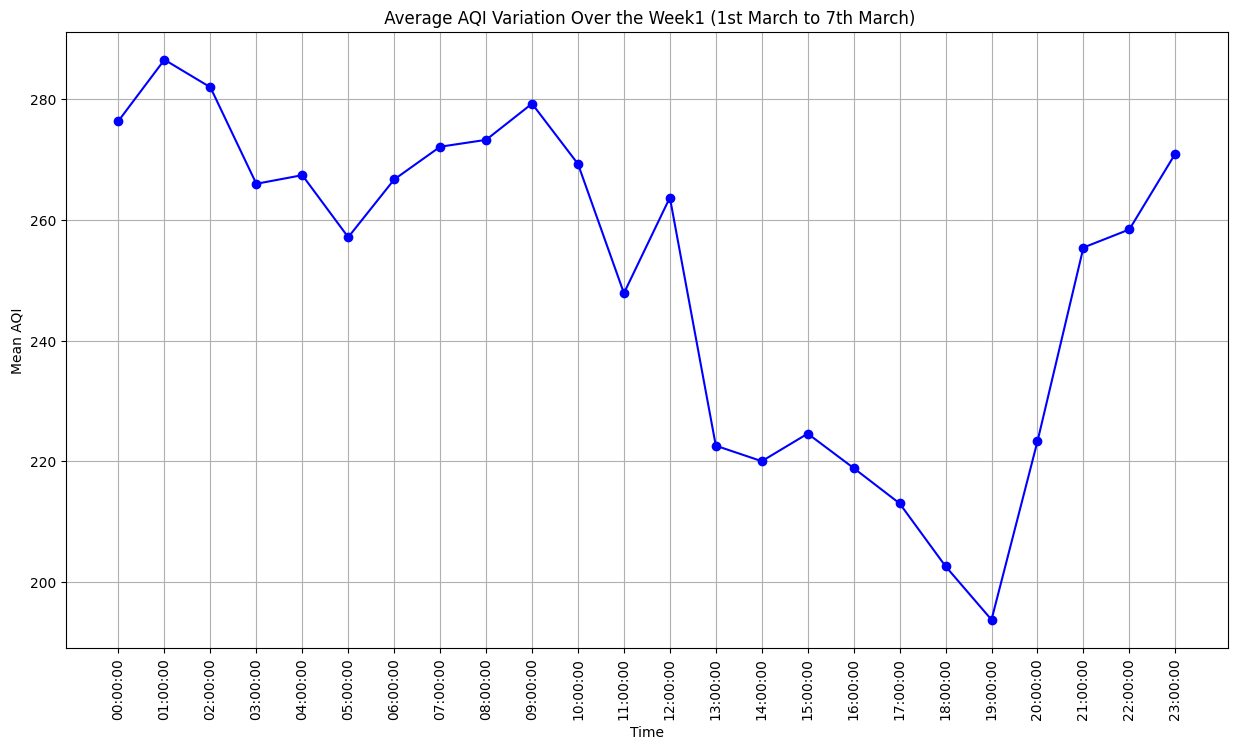

In [ ]:
# Assuming df1 is your DataFrame
df = df1.copy()

# Group by 'Time' and calculate the mean AQI for each hour
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()

# Plotting AQI against time
plt.figure(figsize=(15, 8))
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')

plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title(' Average AQI Variation Over the Week1 (1st March to 7th March)')
plt.grid(True)
plt.show()

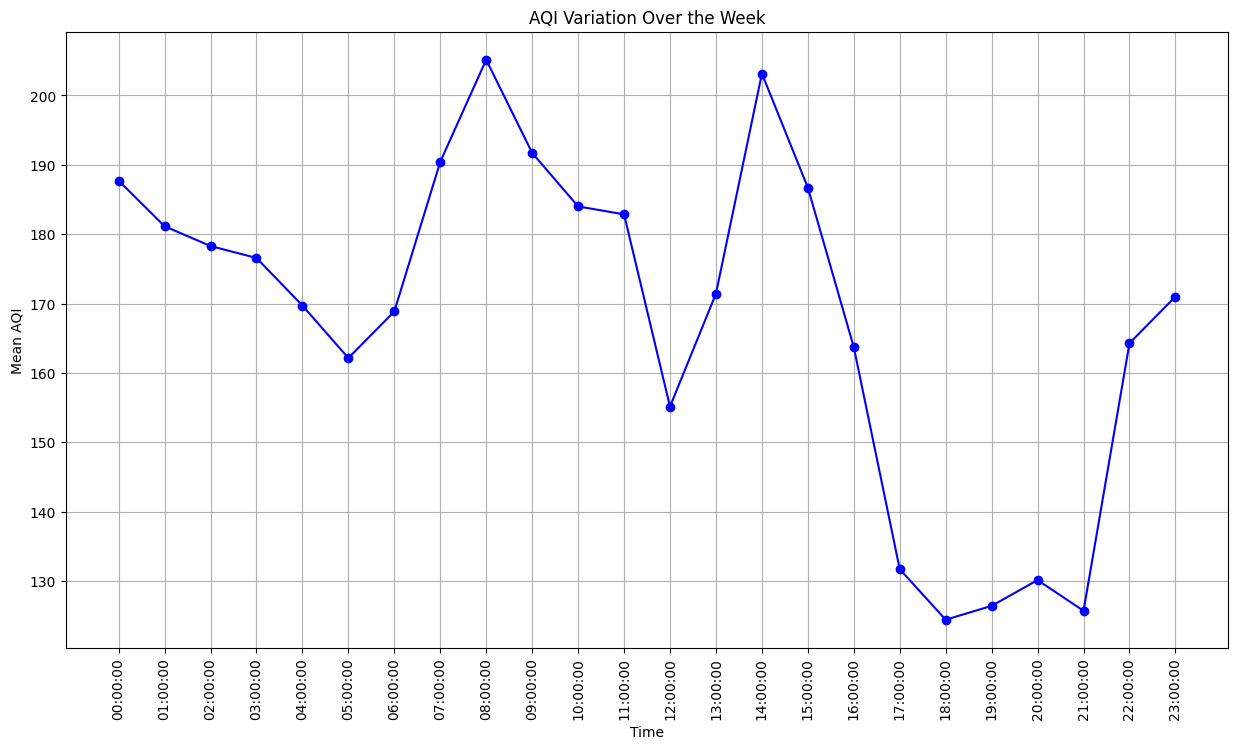

In [ ]:
df = df2.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.figure(figsize=(15, 8))
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week')
plt.grid(True)
plt.show()

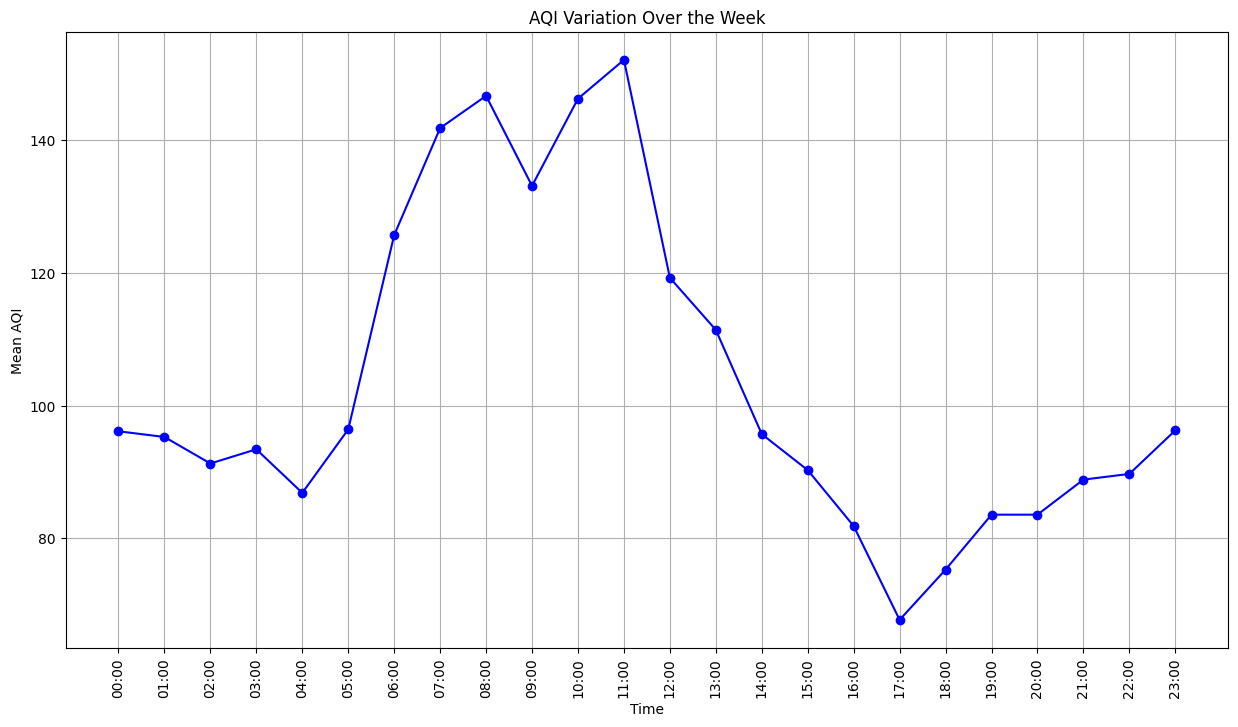

In [ ]:
df = df3.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.figure(figsize=(15, 8))
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week')
plt.grid(True)
plt.show()

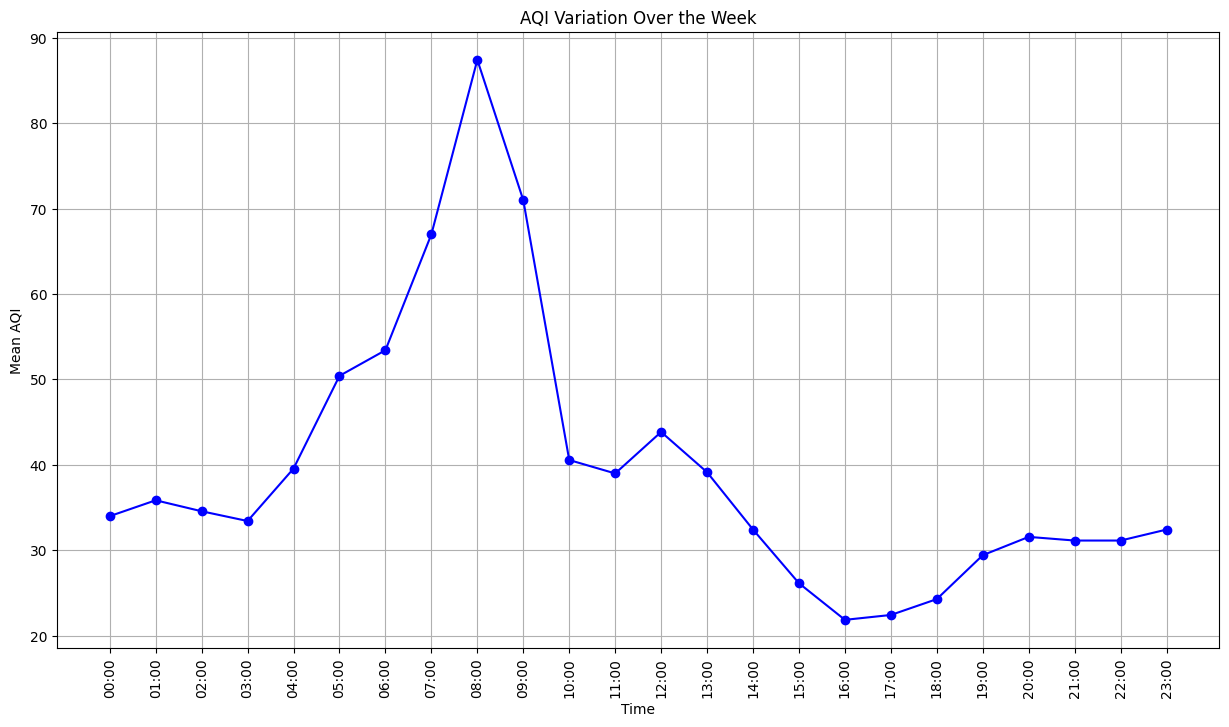

In [ ]:
df = df4.copy()
grouped_data = df.groupby('Time')['AQI'].mean().reset_index()
plt.figure(figsize=(15, 8))
plt.plot(grouped_data['Time'], grouped_data['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Mean AQI')
plt.title('AQI Variation Over the Week')
plt.grid(True)
plt.show()

## Previous analysis


In [ ]:
mode = {'Days':['Wednesday','Thrusday','Friday','Saturday','Sunday','Monday','Tuesday']
            , 'AQI': [146,76,103,60,62,43,33],'PM10':[70,97,67,52,50,30,22],'PM2.5':[74,46,53,41,39,26,24]}
m =pd.DataFrame(mode)
print(m)

        Days  AQI  PM10  PM2.5
0  Wednesday  146    70     74
1   Thrusday   76    97     46
2     Friday  103    67     53
3   Saturday   60    52     41
4     Sunday   62    50     39
5     Monday   43    30     26
6    Tuesday   33    22     24


In [ ]:
mean = {'Days':['Wednesday','Thrusday','Friday','Saturday','Sunday','Monday','Tuesday']
, 'AQI' :[150.826087,147.833333,139.625000, 128.750000,63.583333, 44.291667,47.916667],
  'PM10': [ 86.130435,84.375000,83.583333,77.750000,48.041667, 31.500000,35.208333],
  'PM2.5':[75.173913,73.375000,71.750000,64.291667,38.416667, 26.750000,28.791667]
        }
m2 =pd.DataFrame(mean)
print(m2)

        Days         AQI       PM10      PM2.5
0  Wednesday  150.826087  86.130435  75.173913
1   Thrusday  147.833333  84.375000  73.375000
2     Friday  139.625000  83.583333  71.750000
3   Saturday  128.750000  77.750000  64.291667
4     Sunday   63.583333  48.041667  38.416667
5     Monday   44.291667  31.500000  26.750000
6    Tuesday   47.916667  35.208333  28.791667


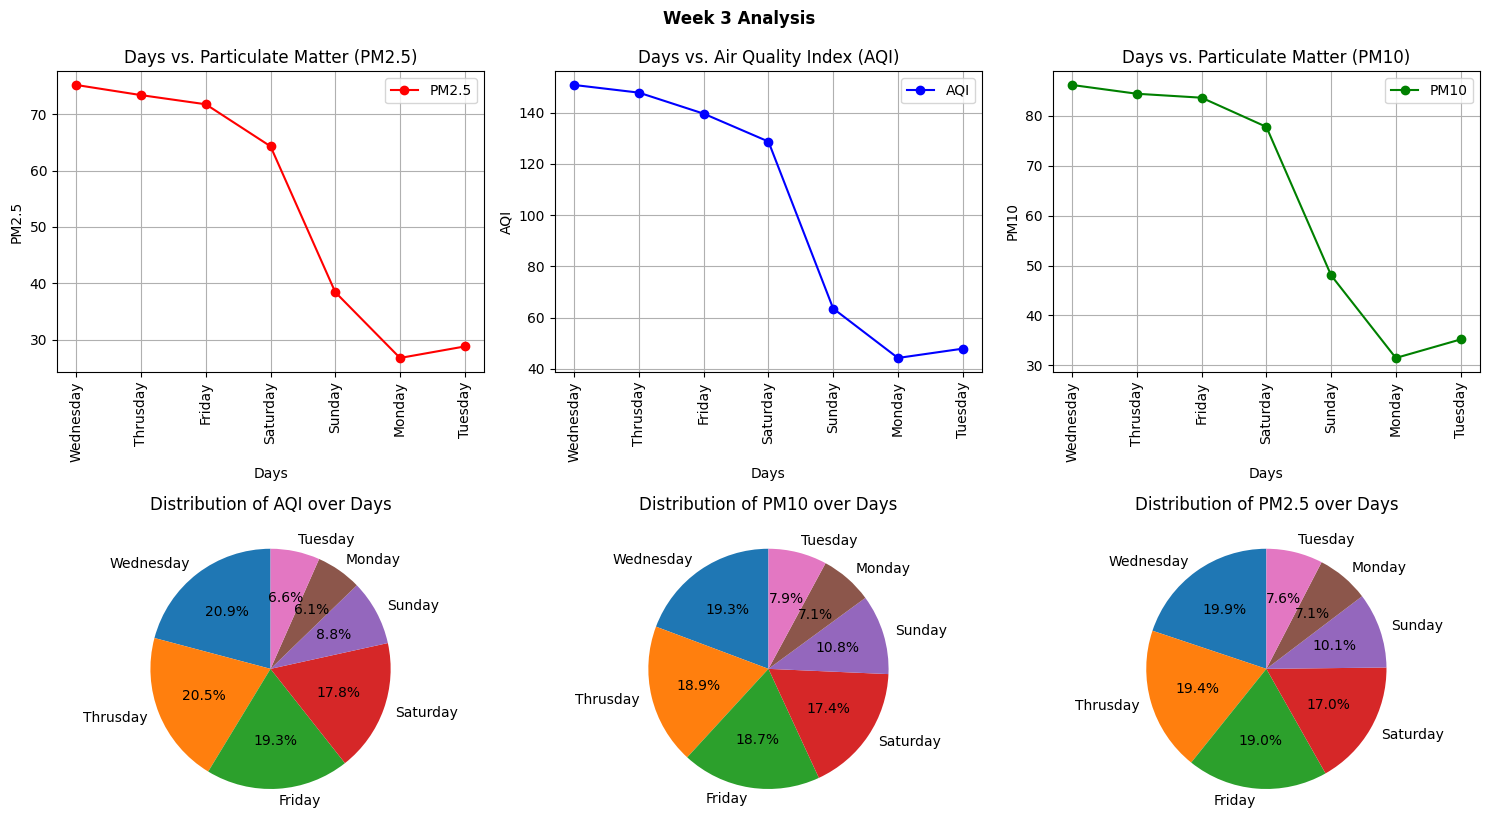

In [ ]:
plt.figure(figsize= (15,8))
plt.subplot(2, 3, 1)
Days = m2['Days']
PM = m2['PM2.5']
plt.plot(Days, PM, marker='o', linestyle='-', color='r', label='PM2.5')
plt.xlabel('Days')
plt.ylabel('PM2.5')
plt.title('Days vs. Particulate Matter (PM2.5)')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()

# Subplot 2
plt.subplot(2,3, 2)
Days = m2['Days']
aqi = m2['AQI']
plt.plot(Days, aqi, marker='o', linestyle='-', color='b', label='AQI')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.title('Days vs. Air Quality Index (AQI)')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()

# Subplot 3
plt.subplot(2,3, 3)
Days = m2['Days']
PM = m2['PM10']
plt.plot(Days, PM, marker='o', linestyle='-', color='g', label='PM10')
plt.xlabel('Days')
plt.ylabel('PM10')
plt.title('Days vs. Particulate Matter (PM10)')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()

# Subplot 4
plt.subplot( 2,3, 4)
plt.pie(aqi, labels=Days, autopct='%1.1f%%', startangle=90,radius=1)
plt.title('Distribution of AQI over Days',loc='center',y=1)

plt.subplot( 2,3, 5)
PM = m2['PM10']
plt.pie(PM, labels=Days, autopct='%1.1f%%', startangle=90,radius=1)
plt.title('Distribution of PM10 over Days',loc='center',y=1.0)

plt.subplot( 2,3, 6)
PM = m2['PM2.5']
plt.pie(PM, labels=Days, autopct='%1.1f%%', startangle=90,radius=1)
plt.title('Distribution of PM2.5 over Days',loc='center',y=1.0)


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.suptitle('Week 3 Analysis  ', y=1.03 ,ha='center',fontweight='bold')
# Show the plots
plt.show()

## Ploting using Funtion

In [ ]:
def mean_daily_parameters(df1):
    # Determine the unique order of days in the dataset
    day_order = df1['DayOfWeek'].unique()

    # Convert 'DayOfWeek' column to categorical with the unique order
    df1['DayOfWeek'] = pd.Categorical(df1['DayOfWeek'], categories=day_order, ordered=True)

    # Group by 'DayOfWeek', compute mean, and reset the index
    df = df1.groupby(by=['DayOfWeek']).mean().reset_index()

    # Print the tabulated result
    print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))

    return df

In [ ]:
mean_df1 = mean_daily_parameters(df1)

+-------------+---------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| DayOfWeek   |     AQI |   PM 2.5 - ug/m³ |   PM 10 - ug/m³ |   Temp - °C |   Hum - % |   Dew Point - °C |   Wet Bulb - °C |   Heat Index - °C |
+=============+=========+==================+=================+=============+===========+==================+=================+===================+
| Wednesday   | 172.917 |          84.3333 |         97.1667 |     28.1667 |   53.0417 |          17.375  |         19.7917 |           29.0417 |
+-------------+---------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| Thursday    | 275     |         115.542  |        129.75   |     28.7917 |   50.875  |          17.4583 |         19.9167 |           29.75   |
+-------------+---------+------------------+-----------------+-------------+-----------+------------------+-----------------

<ipython-input-49-e27bd0025eca>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df1.groupby(by=['DayOfWeek']).mean().reset_index()


## Solving error occured due noise present in the dataset

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             168 non-null    datetime64[ns]
 1   Time             168 non-null    object        
 2   AQI              168 non-null    float64       
 3   PM 2.5 - ug/m³   168 non-null    float64       
 4   PM 10 - ug/m³    168 non-null    float64       
 5   Temp - °C        168 non-null    float64       
 6   Hum - %          168 non-null    float64       
 7   Dew Point - °C   168 non-null    float64       
 8   Wet Bulb - °C    168 non-null    float64       
 9   Heat Index - °C  168 non-null    float64       
 10  DayOfWeek        168 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 16.6+ KB


In [ ]:
df2.isnull()

Date   Time    AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  Temp - °C  Hum - %  \
0    False  False  False           False          False      False    False   
1    False  False  False           False          False      False    False   
2    False  False  False           False          False      False    False   
3    False  False  False           False          False      False    False   
4    False  False  False           False          False      False    False   
..     ...    ...    ...             ...            ...        ...      ...   
187   True   True   True            True           True       True     True   
188   True   True   True            True           True       True     True   
189   True   True   True            True           True       True     True   
190   True   True   True            True           True       True     True   
191   True   True   True            True           True       True     True   

     Dew Point - °C  Wet Bulb - °C  Heat Index - °C  DayOfWeek  
0             False          False            False      False  
1             False          False            False      False  
2             False          False            False      False  
3             False          False            False      False  
4             False          False            False      False  
..              ...            ...              ...        ...  
187            True           True             True       True  
188            True           True             True       True  
189            True           True             True       True  
190            True           True             True       True  
191            True           True             True       True  

[192 rows x 11 columns]

In [ ]:
df2.dropna()

Date      Time    AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  Temp - °C  \
0   2023-03-08  00:00:00  120.0            67.0           78.0       28.0   
1   2023-03-08  01:00:00  132.0            70.0           80.0       29.0   
2   2023-03-08  02:00:00  159.0            78.0           89.0       28.0   
3   2023-03-08  03:00:00  127.0            68.0           78.0       28.0   
4   2023-03-08  04:00:00   95.0            57.0           71.0       28.0   
..         ...       ...    ...             ...            ...        ...   
163 2023-03-14  19:00:00   94.0            56.0           71.0       29.0   
164 2023-03-14  20:00:00   93.0            56.0           70.0       29.0   
165 2023-03-14  21:00:00   96.0            58.0           72.0       29.0   
166 2023-03-14  22:00:00   96.0            58.0           71.0       29.0   
167 2023-03-14  23:00:00  102.0            61.0           74.0       29.0   

     Hum - %  Dew Point - °C  Wet Bulb - °C  Heat Index - °C  DayOfWeek  
0       56.0            19.0           21.0             29.0  Wednesday  
1       54.0            18.0           21.0             30.0  Wednesday  
2       62.0            20.0           22.0             30.0  Wednesday  
3       46.0            15.0           18.0             28.0  Wednesday  
4       43.0            14.0           17.0             27.0  Wednesday  
..       ...             ...            ...              ...        ...  
163     65.0            22.0           24.0             33.0    Tuesday  
164     65.0            22.0           23.0             32.0    Tuesday  
165     66.0            22.0           24.0             33.0    Tuesday  
166     64.0            22.0           24.0             33.0    Tuesday  
167     66.0            22.0           24.0             33.0    Tuesday  

[168 rows x 11 columns]

In [ ]:
df2.isnull()

Date   Time    AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  Temp - °C  Hum - %  \
0    False  False  False           False          False      False    False   
1    False  False  False           False          False      False    False   
2    False  False  False           False          False      False    False   
3    False  False  False           False          False      False    False   
4    False  False  False           False          False      False    False   
..     ...    ...    ...             ...            ...        ...      ...   
187  False  False  False           False          False      False    False   
188  False  False  False           False          False      False    False   
189  False  False  False           False          False      False    False   
190  False  False  False           False          False      False    False   
191  False  False  False           False          False      False    False   

     Dew Point - °C  Wet Bulb - °C  Heat Index - °C  DayOfWeek  
0             False          False            False      False  
1             False          False            False      False  
2             False          False            False      False  
3             False          False            False      False  
4             False          False            False      False  
..              ...            ...              ...        ...  
187           False          False            False      False  
188           False          False            False      False  
189           False          False            False      False  
190           False          False            False      False  
191           False          False            False      False  

[192 rows x 11 columns]

In [ ]:
df2.drop(df2.index[168:], inplace=True)


In [ ]:
print(df2.to_string())

                    Date      Time    AQI PM 2.5 - ug/m³ PM 10 - ug/m³ Temp - °C Hum - % Dew Point - °C Wet Bulb - °C Heat Index - °C  DayOfWeek
0    2023-03-08 00:00:00  00:00:00  120.0           67.0          78.0      28.0    56.0           19.0          21.0            29.0  Wednesday
1    2023-03-08 00:00:00  01:00:00  132.0           70.0          80.0      29.0    54.0           18.0          21.0            30.0  Wednesday
2    2023-03-08 00:00:00  02:00:00  159.0           78.0          89.0      28.0    62.0           20.0          22.0            30.0  Wednesday
3    2023-03-08 00:00:00  03:00:00  127.0           68.0          78.0      28.0    46.0           15.0          18.0            28.0  Wednesday
4    2023-03-08 00:00:00  04:00:00   95.0           57.0          71.0      28.0    43.0           14.0          17.0            27.0  Wednesday
5    2023-03-08 00:00:00  05:00:00   98.0           60.0          74.0      28.0    42.0           14.0          17.0            2

In [ ]:
mean_df2 = mean_daily_parameters(df2)

+------------------+---------------------+----------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| DayOfWeek        | Date                |      AQI |   PM 2.5 - ug/m³ |   PM 10 - ug/m³ |   Temp - °C |   Hum - % |   Dew Point - °C |   Wet Bulb - °C |   Heat Index - °C |
+==================+=====================+==========+==================+=================+=============+===========+==================+=================+===================+
| Wednesday        | 2023-03-08 00:00:00 | 134.917  |          70.4583 |         82.2917 |     28.75   |   51.7917 |          17.8333 |         20.2917 |           29.9167 |
+------------------+---------------------+----------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| Thursday         | 2023-03-09 00:00:00 | 115.708  |          62.6667 |         75.7917 |     29.8333 |   41.4167 |          15.1

<ipython-input-49-e27bd0025eca>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df1.groupby(by=['DayOfWeek']).mean().reset_index()


In [ ]:
print(mean_df2.columns)


Index(['DayOfWeek', 'AQI', 'PM 2.5 - ug/m³', 'PM 10 - ug/m³', 'Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Heat Index - °C'],
      dtype='object')


## Weekly analysis


In [ ]:
mean_df1 = mean_daily_parameters(df1)
mean_df2 = mean_daily_parameters(df2)
mean_df3 = mean_daily_parameters(df3)
mean_df4 = mean_daily_parameters(df4)

+-------------+---------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| DayOfWeek   |     AQI |   PM 2.5 - ug/m³ |   PM 10 - ug/m³ |   Temp - °C |   Hum - % |   Dew Point - °C |   Wet Bulb - °C |   Heat Index - °C |
+=============+=========+==================+=================+=============+===========+==================+=================+===================+
| Wednesday   | 172.917 |          84.3333 |         97.1667 |     28.1667 |   53.0417 |          17.375  |         19.7917 |           29.0417 |
+-------------+---------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| Thursday    | 275     |         115.542  |        129.75   |     28.7917 |   50.875  |          17.4583 |         19.9167 |           29.75   |
+-------------+---------+------------------+-----------------+-------------+-----------+------------------+-----------------

<ipython-input-49-e27bd0025eca>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df1.groupby(by=['DayOfWeek']).mean().reset_index()
<ipython-input-49-e27bd0025eca>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df1.groupby(by=['DayOfWeek']).mean().reset_index()
<ipython-input-49-e27bd0025eca>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df1.groupby(by=['DayOfWeek']).mean().reset_index()
<ipython-i

In [ ]:
mean_df2.drop(columns=['Date'])

DayOfWeek         AQI  PM 2.5 - ug/m³  PM 10 - ug/m³  Temp - °C  \
0         Wednesday  134.916667       70.458333      82.291667  28.750000   
1          Thursday  115.708333       62.666667      75.791667  29.833333   
2            Friday   89.291667       51.125000      63.166667  29.833333   
3          Saturday  120.166667       64.958333      77.041667  30.375000   
4            Sunday  210.416667       93.875000     104.750000  31.208333   
5            Monday  278.958333      123.375000     137.166667  31.625000   
6           Tuesday  226.666667      104.125000     118.958333  30.500000   
7  default_category         NaN             NaN            NaN        NaN   

     Hum - %  Dew Point - °C  Wet Bulb - °C  Heat Index - °C  
0  51.791667       17.833333      20.291667        29.916667  
1  41.416667       15.125000      18.166667        30.041667  
2  35.375000       12.500000      16.166667        29.208333  
3  41.458333       15.500000      18.666667        30.791667  
4  44.375000       17.500000      20.125000        32.416667  
5  46.208333       18.375000      20.875000        33.458333  
6  52.708333       19.541667      21.916667        32.666667  
7        NaN             NaN            NaN              NaN

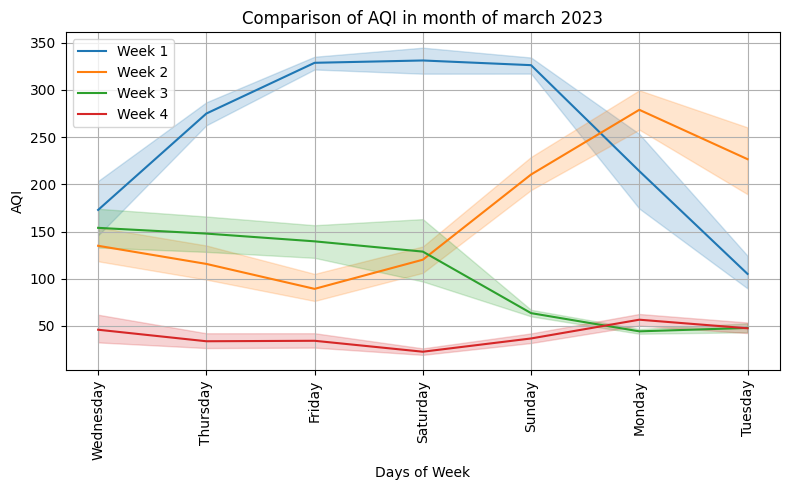

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (8,5))

def plot_line_graphs(dataframes, parameter_column):


    for i, df in enumerate(dataframes, 1):
        # Remove extra space from column name
        df['Date'] = pd.to_datetime(df['Date'])

        # Plot the line graph
        sns.lineplot(x='DayOfWeek', y=parameter_column, data=df, label=f'Week {i}')
    plt.grid(True)
    plt.title(f'Comparison of {parameter_column} in month of march 2023')
    plt.xlabel('Days of Week')
    plt.ylabel(parameter_column)
    plt.xticks(rotation=90)

    plt.legend()
    plt.tight_layout()
    plt.show()

dataframes = [df1, df2, df3, df4]
parameter_column = 'AQI'
plot_line_graphs(dataframes, parameter_column)


In [ ]:
import matplotlib.pyplot as plt

def plot_analysis(data, title_suffix=''):
    plt.figure(figsize=(15, 9))

    # Subplot 1
    plt.subplot(2, 3, 1)
    plt.plot(data['DayOfWeek'], data['Temp - °C'], marker='o', linestyle='-', color='r', label='Temperature')
    plt.xlabel('Days')
    plt.ylabel('Temp')
    plt.title(f'Days vs. Temperature in degree Celsius - {title_suffix}')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()

    # Subplot 2
    plt.subplot(2, 3, 2)
    plt.plot(data['DayOfWeek'], data['AQI'], marker='o', linestyle='-', color='b', label='AQI')
    plt.xlabel('Days')
    plt.ylabel('AQI')
    plt.title(f'Days vs. Air Quality Index (AQI) - {title_suffix}')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()

    # Subplot 3
    plt.subplot(2, 3, 4)
    plt.plot(data['DayOfWeek'], data['Hum - %'], marker='o', linestyle='-', color='g', label='Humidity')
    plt.xlabel('Days')
    plt.ylabel('Humidity')
    plt.title(f'Days vs. Humidity - {title_suffix}')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()

    # Subplot 4
    plt.subplot(2, 3, 3)
    plt.pie(data['AQI'], labels=data['DayOfWeek'], autopct='%1.1f%%', startangle=90, radius=1)
    plt.title(f'Distribution of AQI over Days - {title_suffix}', loc='center', y=1)

    # Subplot 5
    plt.subplot(2, 3, 6)
    plt.pie(data['Wet Bulb - °C'], labels=data['DayOfWeek'], autopct='%1.1f%%', startangle=90, radius=1)
    plt.title(f'Distribution of Wet Bulb - °C - {title_suffix}', loc='center', y=1.0)

    # Subplot 6
    plt.subplot(2, 3, 5)
    plt.plot(data['DayOfWeek'], data['Heat Index - °C'], marker='o', linestyle='-', color='y', label='Heat Index')
    plt.xlabel('Days')
    plt.ylabel('Heat Index')
    plt.title(f'Days vs. Heat Index - {title_suffix}')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.suptitle(f'Analysis - {title_suffix}', y=1.03, ha='center', fontweight='bold')

    # Show the plot
    plt.show()


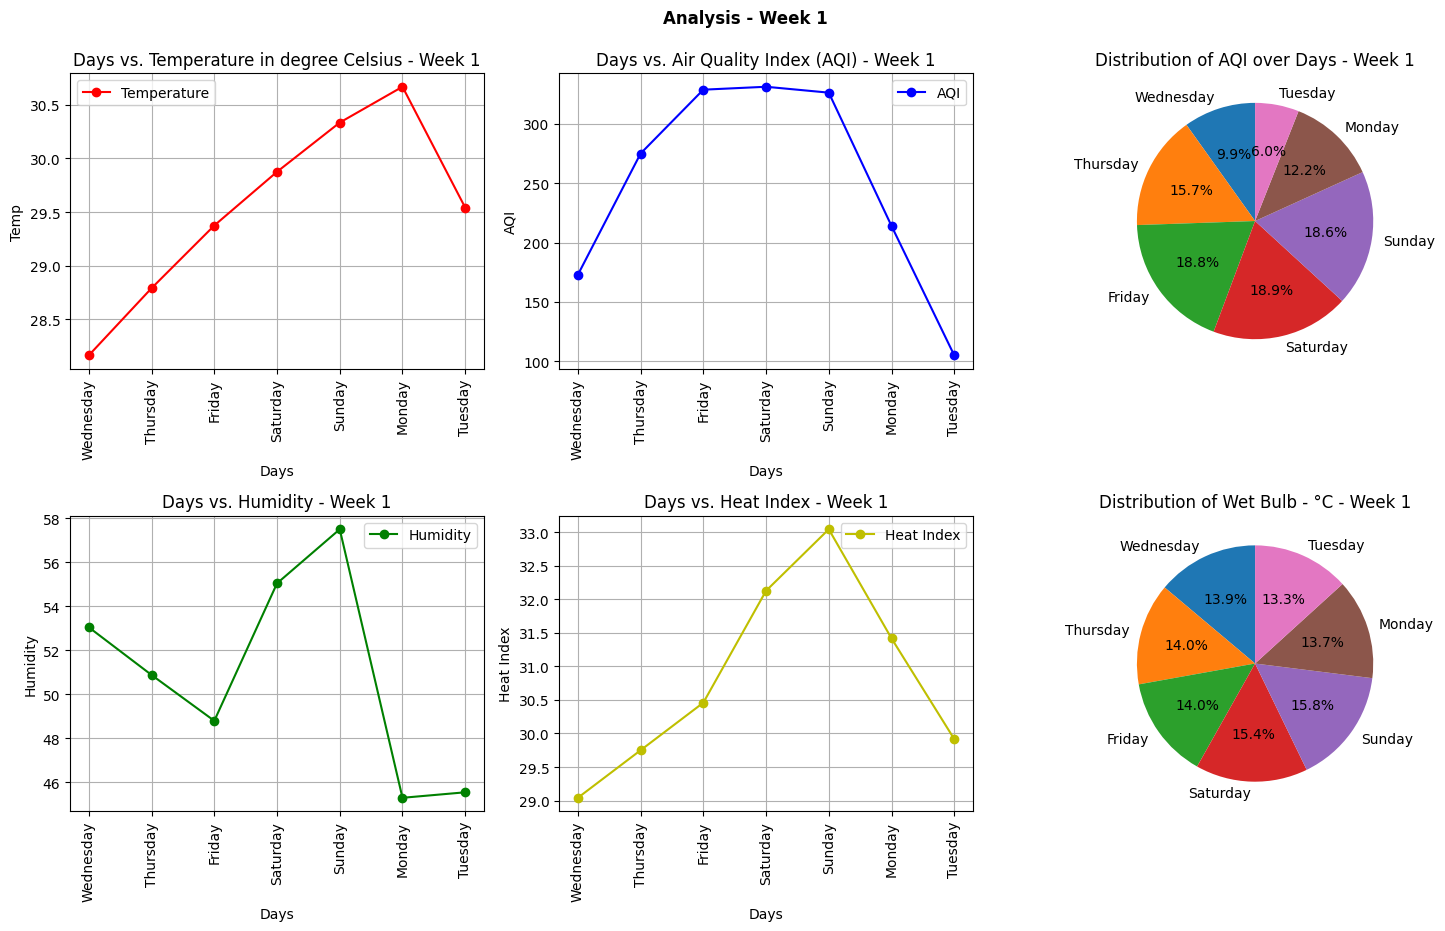

In [ ]:
plot_analysis(mean_df1, title_suffix='Week 1')

In [ ]:
mean_df2 = mean_df2.dropna()

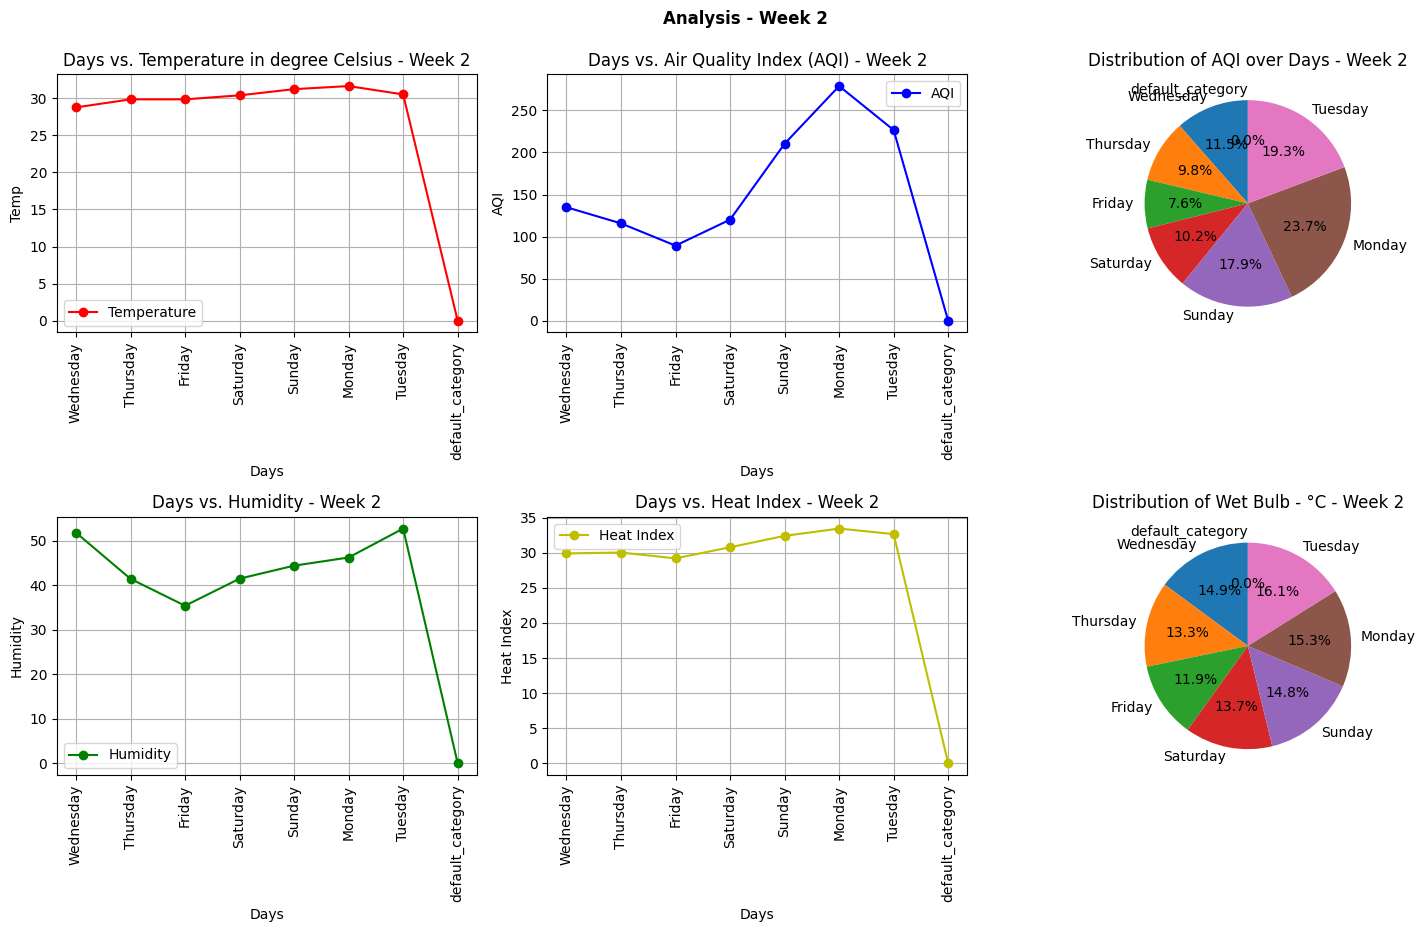

In [ ]:
plot_analysis(mean_df2, title_suffix='Week 2')

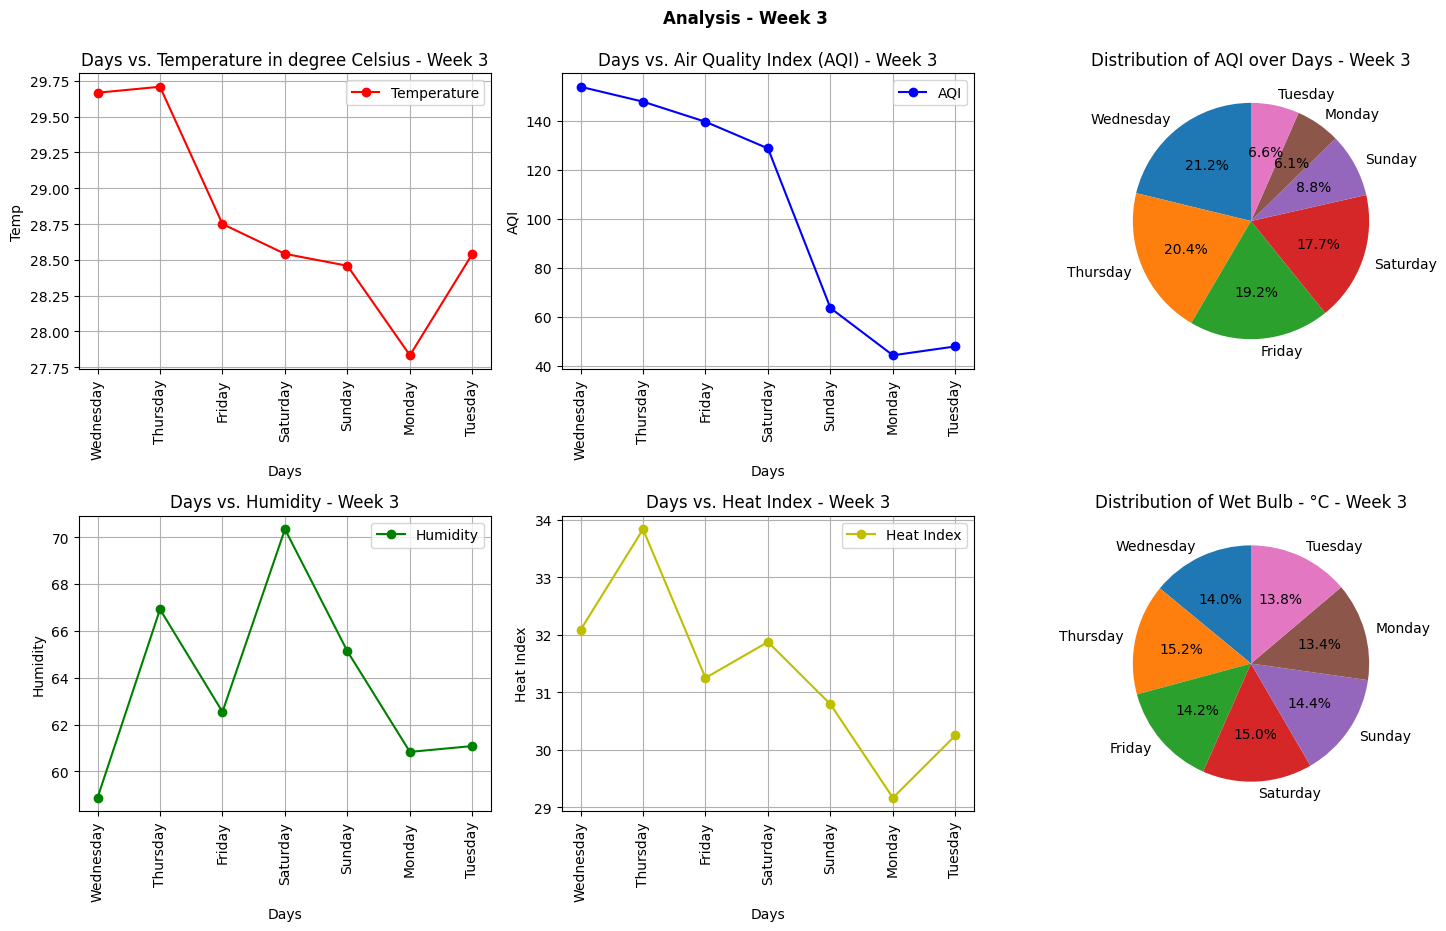

In [ ]:
plot_analysis(mean_df3, title_suffix='Week 3')

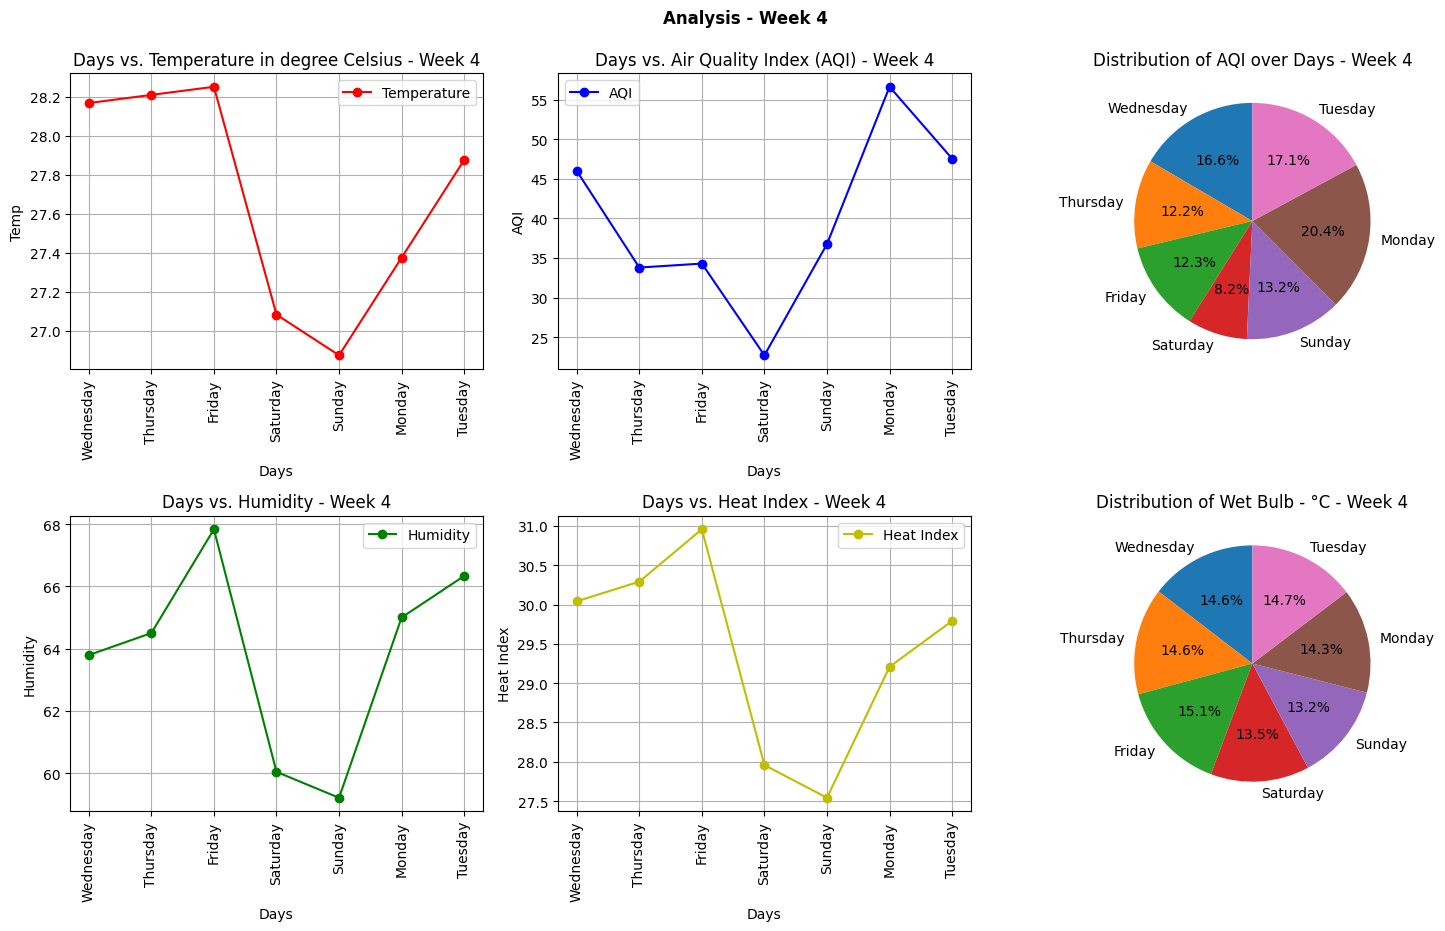

In [ ]:
plot_analysis(mean_df4, title_suffix='Week 4')

## Normalized Graph
Normalize all numeric columns in a DataFrame using MinMaxScaler.  

it is used to normalize coloumn  
 Parameters:  
   - df (pd.DataFrame): The input DataFrame.  
Returns:
    - pd.DataFrame: DataFrame with normalized values.  

There is a another function normalizer() which is used to normalized rows
  

**`scaler.fit_transform` Explanation:**

`scaler.fit_transform` is a method used in scikit-learn to perform both the fitting (computing the necessary parameters) and the transformation (scaling) of a dataset in a single step. Here's why we use it:

**Fitting:**

- Before you can scale or transform your data, the scaler needs to learn certain parameters from your dataset. For instance, in Min-Max scaling, it needs to know the minimum and maximum values of each feature.
- The `fit` part of `fit_transform` is responsible for computing these parameters based on the data you provide.

**Transforming:**

- Once the scaler has learned from the data, it can then transform the dataset by applying the scaling transformation.
- The `transform` part of `fit_transform` performs the actual scaling on the data based on the parameters learned during the fitting step.

**Convenience:**

- Using `fit_transform` is a convenient way to apply the scaler's transformation to the data in one go.
- It ensures that the same scaling parameters are used for both fitting and transforming, maintaining consistency between training and testing datasets.

**Efficiency:**

- By combining fitting and transforming, you avoid redundant computations. The scaler only needs to traverse the dataset once to compute the necessary parameters and apply the transformation.

**Pipeline Integration:**

- When building machine learning pipelines in scikit-learn, it's common to use `fit_transform` to seamlessly integrate preprocessing steps into the overall modeling pipeline.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):

    df_normalized = df.copy()

#select_dtype : select the specific type i.e float,int,object, of data. here it will select the whole coloumn.
  # include is used to include the type
    # Convert numeric columns to numeric type
    numeric_columns = df.select_dtypes(include=[float, int]).columns
    df_normalized[numeric_columns] = df_normalized[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Use MinMaxScaler for normalization
   # MinMaxScaler scales and translates each feature (column) individually such that it is in the range [0, 1].
    scaler = MinMaxScaler()
    df_normalized[numeric_columns] = scaler.fit_transform(df_normalized[numeric_columns])

    return df_normalized



In [ ]:
df1_nor = normalize_data(df1)
df2_nor = normalize_data(df2)
df3_nor = normalize_data(df3)
df4_nor = normalize_data(df4)

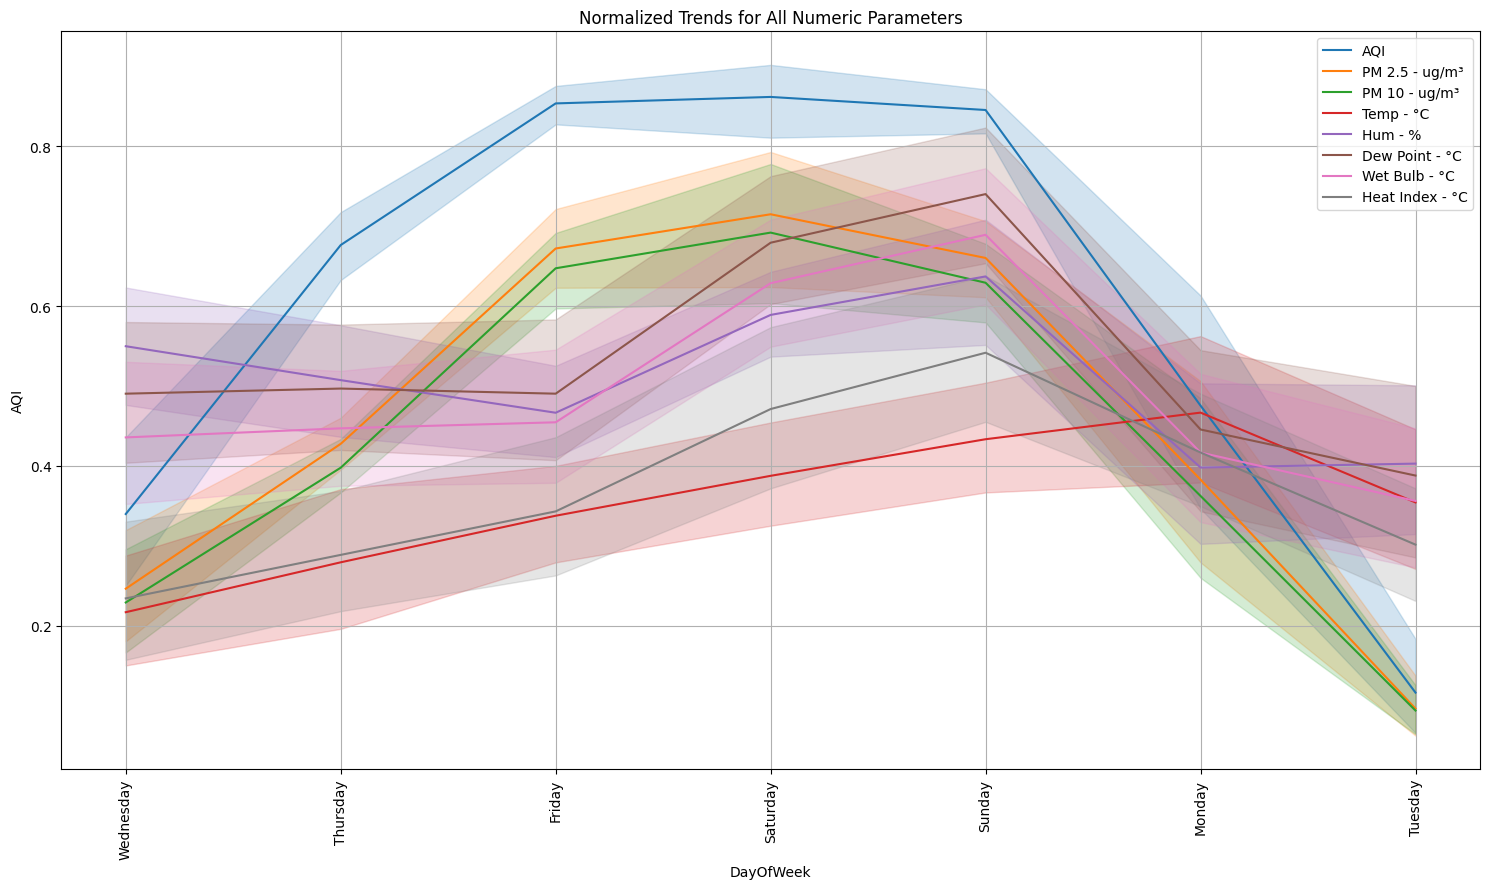

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1_nor is your normalized DataFrame
plt.figure(figsize=(15, 9))

# Identify numeric columns excluding 'DayOfWeek', 'Date', and any other non-numeric columns
numeric_columns = df1_nor.select_dtypes(include=[float,int]).columns

# Iterate through numeric columns and plot lines
for column in numeric_columns:
    sns.lineplot(x='DayOfWeek', y=column, data=df1_nor, label=column)

plt.grid(True)
plt.title('Normalized Trends for All Numeric Parameters')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()


<ipython-input-19-e27bd0025eca>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df1.groupby(by=['DayOfWeek']).mean().reset_index()


+-------------+----------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| DayOfWeek   |      AQI |   PM 2.5 - ug/m³ |   PM 10 - ug/m³ |   Temp - °C |   Hum - % |   Dew Point - °C |   Wet Bulb - °C |   Heat Index - °C |
+=============+==========+==================+=================+=============+===========+==================+=================+===================+
| Wednesday   | 0.339659 |        0.246124  |       0.228843  |    0.216667 |  0.549837 |         0.490385 |        0.435606 |          0.233974 |
+-------------+----------+------------------+-----------------+-------------+-----------+------------------+-----------------+-------------------+
| Thursday    | 0.676568 |        0.427568  |       0.397668  |    0.279167 |  0.507353 |         0.496795 |        0.44697  |          0.288462 |
+-------------+----------+------------------+-----------------+-------------+-----------+------------------+----------

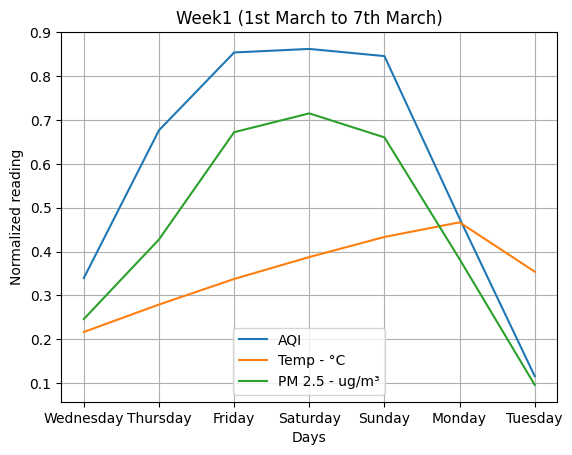

In [ ]:
meandf1 = mean_daily_parameters(df1_nor)
a = meandf1['AQI']
b = meandf1['Temp - °C']
c = meandf1['PM 2.5 - ug/m³']
x = meandf1['DayOfWeek']
plt.plot(x, a, label='AQI')
plt.plot(x, b, label='Temp - °C')
plt.plot(x, c, label='PM 2.5 - ug/m³')
plt.xlabel("Days")
plt.ylabel("Normalized reading")
plt.legend()
plt.title("Week1 (1st March to 7th March)")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming df_normalized is your normalized DataFrame


# Extract all columns except 'DayOfWeek'
columns_to_plot = meandf1.columns.difference(['DayOfWeek'])

# Plot a line for each parameter
for column in columns_to_plot:
    plt.plot(meandf1['DayOfWeek'], meandf1 [column], label=column)

plt.xlabel("DayOfWeek")
plt.ylabel("Normalized reading")
plt.legend()
plt.title("Normalized Trends for All Parameters")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_weekly_analysis(data, title_suffix=''):
    mean = mean_daily_parameters(data)

    a = mean['AQI']
    b = mean['Temp - °C']
    c = mean['PM 2.5 - ug/m³']
    x = mean['DayOfWeek']

    plt.plot(x, a, label='AQI')
    plt.plot(x, b, label='Temp - °C')
    plt.plot(x, c, label='PM 2.5 - ug/m³')

    plt.xlabel("Days")
    plt.ylabel("Normalized reading")
    plt.legend()
    plt.title(f"Weekly Analysis {title_suffix}")
    plt.grid(True)
    plt.show()

In [ ]:
plot_weekly_analysis(df2_nor, title_suffix='Week 2(8th March to 15th March)')

In [ ]:
plot_weekly_analysis(df3_nor, title_suffix='Week 3(16th March to 21th March)')

In [ ]:
plot_weekly_analysis(df4_nor, title_suffix='Week4(22th March to 31th March)')

## Average hourly graph


In [ ]:
df =pd.read_csv('/content/Airlink.march.csv',skiprows=(5), encoding='ISO-8859-1')

In [ ]:
df['Date & Time']=pd.to_datetime(df['Date & Time'])
df['day']= df['Date & Time'].dt.day_name()
df['hour'] = df['Date & Time'].dt.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date & Time           2977 non-null   datetime64[ns]
 1   AQI                   2977 non-null   int64         
 2   High AQI              2977 non-null   int64         
 3   PM 1 - ug/m³          2977 non-null   int64         
 4   High PM 1 - ug/m³     2977 non-null   int64         
 5   PM 2.5 - ug/m³        2977 non-null   int64         
 6   High PM 2.5 - ug/m³   2977 non-null   int64         
 7   PM 10 - ug/m³         2977 non-null   int64         
 8   High PM 10 - ug/m³    2977 non-null   int64         
 9   Temp - °C             2977 non-null   int64         
 10  High Temp - °C        2977 non-null   int64         
 11  Low Temp - °C         2977 non-null   int64         
 12  Hum - %               2977 non-null   int64         
 13  High Hum - %      

In [ ]:
columns_to_keep = ['AQI', 'Temp - °C', 'hour', 'day', 'PM 2.5 - ug/m³']
df = df[columns_to_keep]

In [ ]:
day_order = df['day'].unique()
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
df1 = df.groupby(by=['day','hour']).mean().reset_index()
print(tabulate(df1, headers='keys', tablefmt='grid', showindex=False))


+-----------+--------+----------+-------------+------------------+
| day       |   hour |      AQI |   Temp - °C |   PM 2.5 - ug/m³ |
+===========+========+==========+=============+==================+
| Wednesday |      0 | 103.25   |     27.95   |          54.8    |
+-----------+--------+----------+-------------+------------------+
| Wednesday |      1 | 113.15   |     27.8    |          57.25   |
+-----------+--------+----------+-------------+------------------+
| Wednesday |      2 | 109.4    |     27.5    |          55.75   |
+-----------+--------+----------+-------------+------------------+
| Wednesday |      3 |  99.1    |     27.4    |          52.45   |
+-----------+--------+----------+-------------+------------------+
| Wednesday |      4 |  95.85   |     27.4    |          53.65   |
+-----------+--------+----------+-------------+------------------+
| Wednesday |      5 |  98.4    |     27.15   |          56.1    |
+-----------+--------+----------+-------------+---------------

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   day             168 non-null    category
 1   hour            168 non-null    int64   
 2   AQI             168 non-null    float64 
 3   Temp - °C       168 non-null    float64 
 4   PM 2.5 - ug/m³  168 non-null    float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 5.9 KB


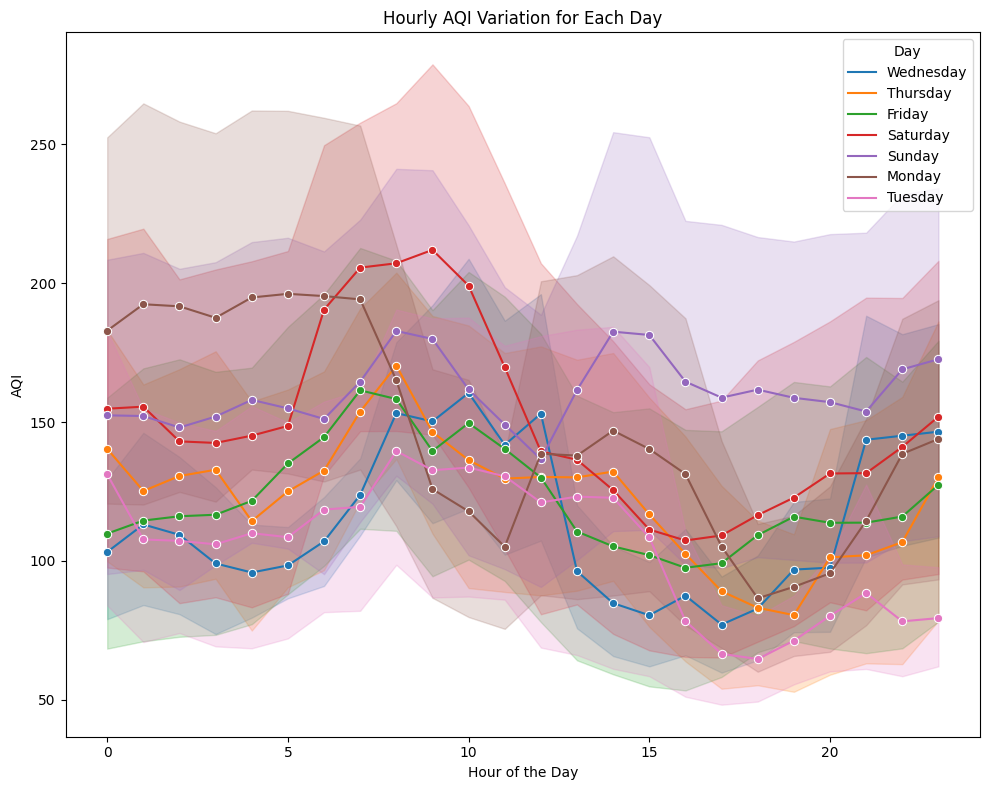

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='hour', y='AQI', hue='day', data=df, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('AQI')
plt.title('Hourly AQI Variation for Each Day')
plt.legend(title='Day')
plt.tight_layout()
plt.show()

In Seaborn, you can create a line plot without the shaded area by using the ci parameter and setting it to None. The .ci' parameter controls the size of the confidence interval for the plot, and setting it to 'None'
 syntax = ci=None

<ipython-input-145-36a44a9a1dd1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='AQI', hue='day', data=df, marker='o',ci=None)


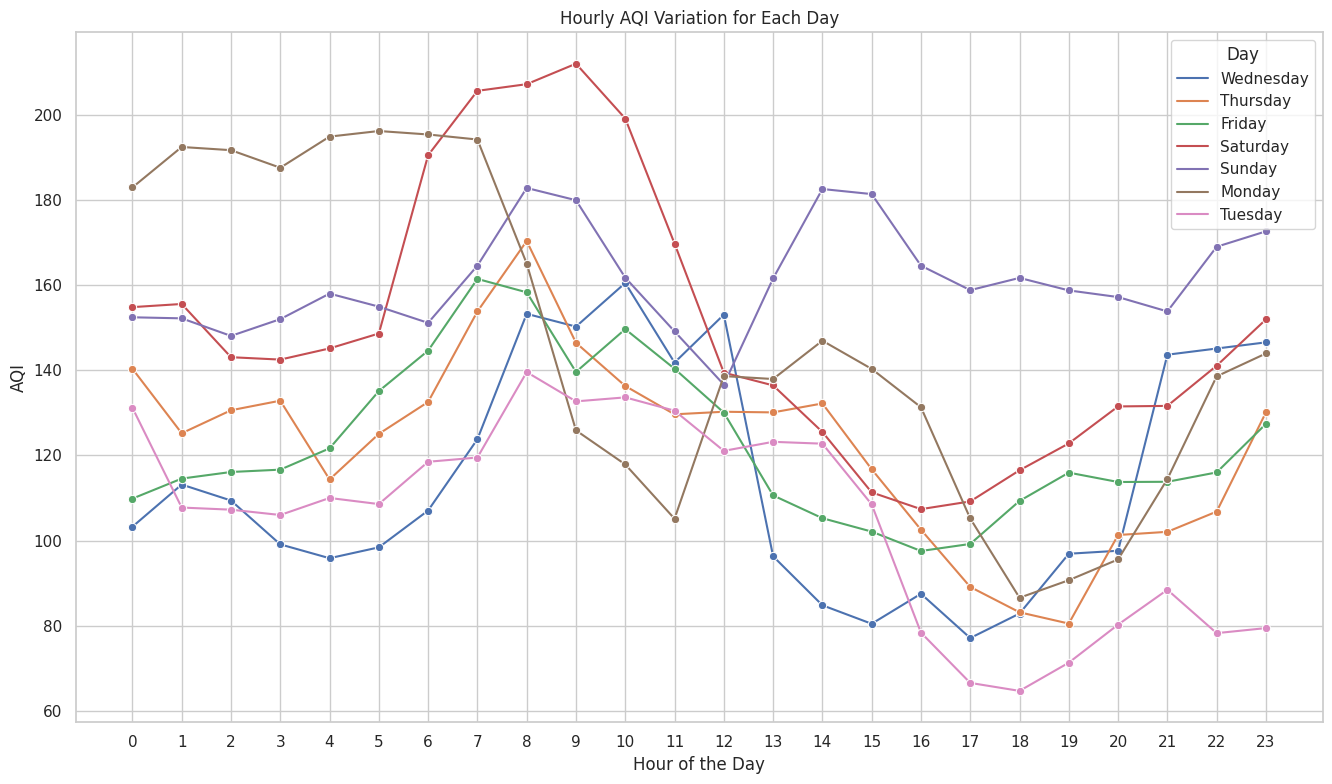

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
sns.lineplot(x='hour', y='AQI', hue='day', data=df, marker='o',ci=None)
plt.xlabel('Hour of the Day')
plt.ylabel('AQI')
plt.title('Hourly AQI Variation for Each Day')
plt.xticks(range(24))
plt.legend(title='Day', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

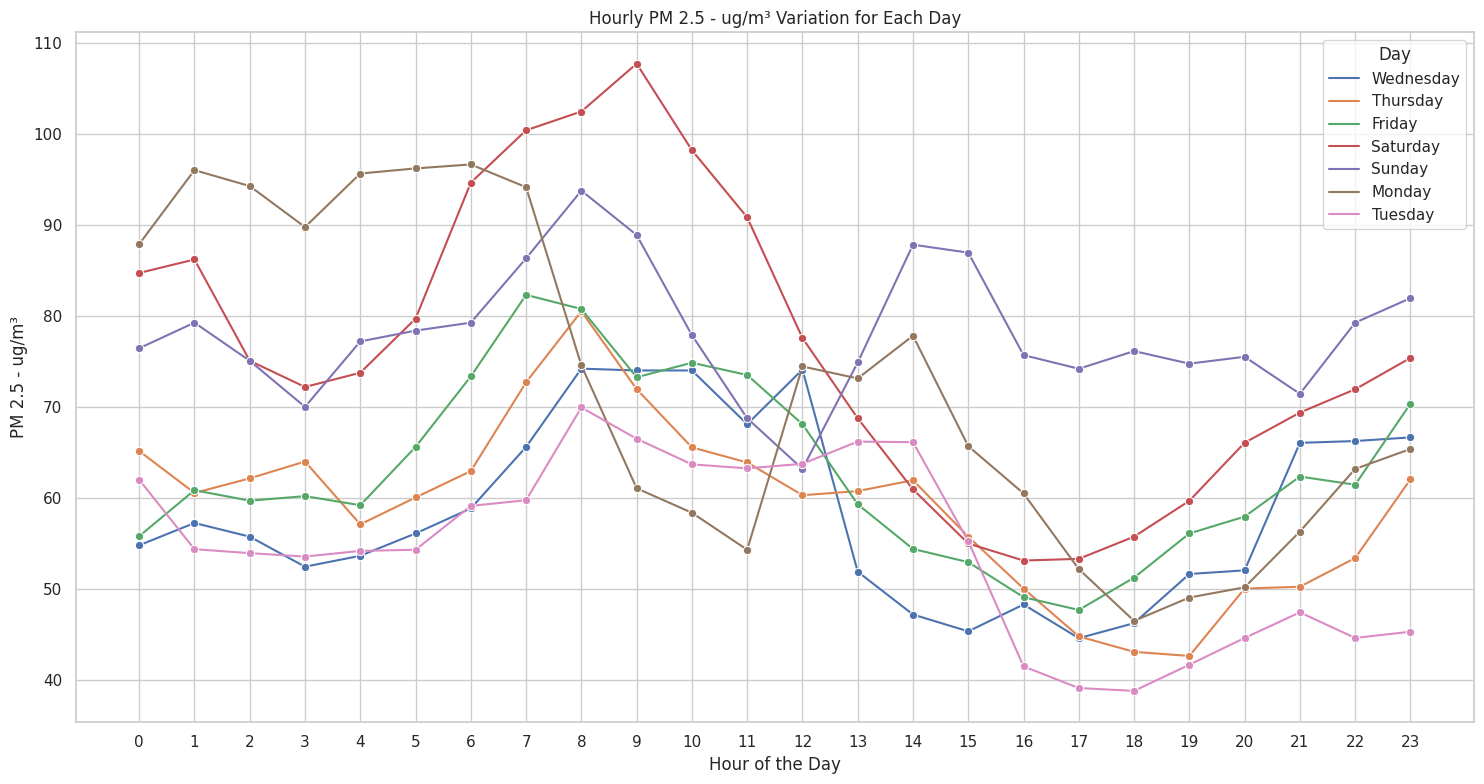

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
sns.lineplot(x='hour', y='PM 2.5 - ug/m³', hue='day', data=df, marker='o',errorbar=None)
plt.xlabel('Hour of the Day')
plt.ylabel('PM 2.5 - ug/m³')
plt.title('Hourly PM 2.5 - ug/m³ Variation for Each Day')
plt.xticks(range(24))
plt.legend(title='Day', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Analyse the whole year data including Rain and other target parameter

In [16]:
df1= pd.read_csv("/content/Weatherlink_UMIT_SNDTWU_9-1-23_12-00_AM_1_Month_1701420590_v2.csv",skiprows=(5),encoding="latin1",parse_dates=['Date & Time'])

In [31]:
df2 = pd.read_csv("/content/Airlink_UMIT_SNDTWU_9-1-23_12-00_AM_1.csv",skiprows=(5),encoding="latin1",parse_dates=['Date & Time'])

In [21]:
df1.head()

Date & Time  Inside Temp - °C  High Inside Temp - °C  \
0 2023-09-01 00:00:00                34                     34   
1 2023-09-01 00:05:00                34                     34   
2 2023-09-01 00:10:00                34                     34   
3 2023-09-01 00:15:00                34                     34   
4 2023-09-01 00:20:00                34                     34   

   Low Inside Temp - °C  Inside Hum - %  High Inside Hum - %  \
0                    34              61                   61   
1                    34              60                   61   
2                    34              60                   61   
3                    34              60                   60   
4                    34              61                   61   

   Low Inside Hum - %  Inside Dew Point - °C  Inside Heat Index - °C  \
0                  61                     25                      42   
1                  60                     25                      42   
2                  60                     25                      42   
3                  60                     25                      42   
4                  60                     25                      42   

   Barometer - in Hg  ...  Rain - in  High Rain Rate - in/h  \
0              29.76  ...        0.0                     --   
1              29.76  ...        0.0                     --   
2              29.76  ...        0.0                     --   
3              29.76  ...        0.0                     --   
4              29.76  ...        0.0                     --   

   Solar Rad - W/m^2 High Solar Rad - W/m^2 ET - in UV Index High UV Index  \
0                 --                     --      --       --            --   
1                 --                     --      --       --            --   
2                 --                     --      --       --            --   
3                 --                     --      --       --            --   
4                 --                     --      --       --            --   

  UV Dose - MEDs Heating Degree Days Cooling Degree Days  
0             --                  --                  --  
1             --                  --                  --  
2             --                  --                  --  
3             --                  --                  --  
4             --                  --                  --  

[5 rows x 50 columns]

In [17]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date & Time                8641 non-null   datetime64[ns]
 1   Inside Temp - °C           8641 non-null   int64         
 2   High Inside Temp - °C      8641 non-null   int64         
 3   Low Inside Temp - °C       8641 non-null   int64         
 4   Inside Hum - %             8641 non-null   int64         
 5   High Inside Hum - %        8641 non-null   int64         
 6   Low Inside Hum - %         8641 non-null   int64         
 7   Inside Dew Point - °C      8641 non-null   int64         
 8   Inside Heat Index - °C     8641 non-null   int64         
 9   Barometer - in Hg          8641 non-null   float64       
 10  High Bar - in Hg           8641 non-null   float64       
 11  Low Bar - in Hg            8641 non-null   float64       
 12  Absolu

In [28]:
df1['Hour'] = df1['Date & Time'].dt.hour
df2['Hour'] = df2['Date & Time'].dt.hour

In [39]:
df1_selected = df1[['Date & Time', 'Temp - °C', 'Dew Point - °C', 'Avg Wind Speed - km/h', 'Prevailing Wind Direction','Rain - in']]
df2_selected = df2[['Date & Time', 'PM 1 - ug/m³', 'PM 2.5 - ug/m³',  'AQI']]
merged_df = pd.merge(df1_selected, df2_selected, on='Date & Time', how='inner')
print(merged_df)


             Date & Time Temp - °C Dew Point - °C Avg Wind Speed - km/h  \
0    2023-09-01 00:00:00        --             --                    --   
1    2023-09-01 00:15:00        --             --                    --   
2    2023-09-01 00:30:00        --             --                    --   
3    2023-09-01 00:45:00        --             --                    --   
4    2023-09-01 01:00:00        --             --                    --   
...                  ...       ...            ...                   ...   
2876 2023-09-30 23:00:00        --             --                    --   
2877 2023-09-30 23:15:00        --             --                    --   
2878 2023-09-30 23:30:00        --             --                    --   
2879 2023-09-30 23:45:00        --             --                    --   
2880 2023-10-01 00:00:00        --             --                    --   

     Prevailing Wind Direction  Rain - in  PM 1 - ug/m³  PM 2.5 - ug/m³  AQI  
0                   

In [24]:
merged_df.head()

Date & Time Temp - °C Dew Point - °C Avg Wind Speed - km/h  \
0 2023-09-01 00:00:00        --             --                    --   
1 2023-09-01 00:15:00        --             --                    --   
2 2023-09-01 00:30:00        --             --                    --   
3 2023-09-01 00:45:00        --             --                    --   
4 2023-09-01 01:00:00        --             --                    --   

  Prevailing Wind Direction  Rain - in  PM 1 - ug/m³  PM 2.5 - ug/m³  AQI  
0                        --        0.0             5               7   12  
1                        --        0.0             5               7   11  
2                        --        0.0             4               6   10  
3                        --        0.0             4               6   10  
4                        --        0.0             4               6   10

In [32]:
merged_df['Hour']= merged_df['Date & Time'].dt.hour


In [36]:
print(merged_df.to_string())



             Date & Time Temp - °C Dew Point - °C Avg Wind Speed - km/h Prevailing Wind Direction  Rain - in  PM 1 - ug/m³  PM 2.5 - ug/m³  AQI  Hour
0    2023-09-01 00:00:00        --             --                    --                        --       0.00             5               7   12     0
1    2023-09-01 00:15:00        --             --                    --                        --       0.00             5               7   11     0
2    2023-09-01 00:30:00        --             --                    --                        --       0.00             4               6   10     0
3    2023-09-01 00:45:00        --             --                    --                        --       0.00             4               6   10     0
4    2023-09-01 01:00:00        --             --                    --                        --       0.00             4               6   10     1
5    2023-09-01 01:15:00        --             --                    --                        --   

In [37]:
merged_df.dropna()

Date & Time Temp - °C Dew Point - °C Avg Wind Speed - km/h  \
0    2023-09-01 00:00:00        --             --                    --   
1    2023-09-01 00:15:00        --             --                    --   
2    2023-09-01 00:30:00        --             --                    --   
3    2023-09-01 00:45:00        --             --                    --   
4    2023-09-01 01:00:00        --             --                    --   
...                  ...       ...            ...                   ...   
2876 2023-09-30 23:00:00        --             --                    --   
2877 2023-09-30 23:15:00        --             --                    --   
2878 2023-09-30 23:30:00        --             --                    --   
2879 2023-09-30 23:45:00        --             --                    --   
2880 2023-10-01 00:00:00        --             --                    --   

     Prevailing Wind Direction  Rain - in  PM 1 - ug/m³  PM 2.5 - ug/m³  AQI  \
0                           --        0.0             5               7   12   
1                           --        0.0             5               7   11   
2                           --        0.0             4               6   10   
3                           --        0.0             4               6   10   
4                           --        0.0             4               6   10   
...                        ...        ...           ...             ...  ...   
2876                        --        0.0            27              42   70   
2877                        --        0.0            27              43   71   
2878                        --        0.0            27              43   71   
2879                        --        0.0            27              43   71   
2880                        --        0.0            26              42   69   

      Hour  
0        0  
1        0  
2        0  
3        0  
4        1  
...    ...  
2876    23  
2877    23  
2878    23  
2879    23  
2880     0  

[2849 rows x 10 columns]